<h1> The Importance of Personality Traits in Agile Software Development: A Case Study </h1>
<hr/>

<h2> 1.0 Developers` personality insight analysis <hr />
using the open source datasets of eoght software development teams JIRA logs </h2>

<h3>1.0.1 load libraries and datasets</h3>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Rectangle
import seaborn as sns
import re
from collections import Counter

In [3]:
changelog = pd.read_csv('jiradataset_changelog.csv')
issues = pd.read_csv('jiradataset_issues.csv')
sprints = pd.read_csv('jiradataset_sprints.csv')
users = pd.read_csv('jiradataset_users.csv')

<h3> 1.0.2 Check the datasets </h3>



In [4]:
changelog.head(3)

,author,created,field,fieldtype,from,fromString,key,project,to,toString
0,jvalkeal,2016-03-03 18:40:53.171,status,jira,10000,To Do,XD-3751,xd,3,In Progress
1,jvalkeal,2016-03-03 18:41:19.429,Pull Request URL,custom,NaN,NaN,XD-3751,xd,NaN,https://github.com/spring-projects/spring-xd/p...
2,jvalkeal,2016-03-03 18:41:19.429,status,jira,3,In Progress,XD-3751,xd,10006,In PR


In [5]:
issues.head(3)

,fields.assignee.name,fields.components,fields.created,fields.creator.name,fields.description,fields.fixVersions,fields.issuetype.name,fields.issuetype.subtask,fields.priority.name,fields.reporter.name,...,fields.status.name,fields.status.statusCategory.name,fields.summary,fields.updated,fields.versions,fields.watches.watchCount,key,storypoints,project,sprint
0,NaN,"[{u'id': u'12786', u'self': u'https://jira.spr...",2016-03-31T22:35:55.000+0000,thomas.risberg,"The MapReduce samples should have ""yarn.resour...",[],Improvement,False,Minor,thomas.risberg,...,To Do,To Do,"Add ""yarn.resourcemanager.scheduler.address"" t...",2016-03-31T22:35:55.000+0000,[],1,XD-3753,2.0,xd,NaN
1,NaN,"[{u'id': u'12784', u'self': u'https://jira.spr...",2016-03-14T18:09:51.000+0000,manju4ever,When i use the admin-ui web portal which runs ...,[],Bug,False,Trivial,manju4ever,...,To Do,To Do,Admin UI login Page failing to load due to req...,2016-03-14T18:09:51.000+0000,"[{u'archived': False, u'description': u'1.3.0 ...",1,XD-3752,20.0,xd,NaN
2,jvalkeal,[],2016-03-03T13:22:14.000+0000,jvalkeal,In a case where reactor's ringbuffer is full a...,[],Bug,False,Major,jvalkeal,...,In PR,In Progress,gpfdist may fail to shutdown with backlog,2016-03-03T18:41:19.000+0000,"[{u'archived': False, u'name': u'1.3.1', u'sel...",1,XD-3751,5.0,xd,NaN


In [6]:
sprints.head(3)

,key,project,sprint.completeDate,sprint.endDate,sprint.id,sprint.name,sprint.startDate,sprint.state
0,XD-3744,xd,2016-02-26T16:32:18.620Z,2016-02-26T08:34:00.000Z,108,Sprint 68,2016-02-16T00:38:45.289Z,CLOSED
1,XD-3743,xd,2016-02-26T16:32:18.620Z,2016-02-26T08:34:00.000Z,108,Sprint 68,2016-02-16T00:38:45.289Z,CLOSED
2,XD-3742,xd,2016-02-26T16:32:18.620Z,2016-02-26T08:34:00.000Z,108,Sprint 68,2016-02-16T00:38:45.289Z,CLOSED


In [7]:
users.head(3)

,Unnamed: 0,displayName,emailAddress,name,project,role,timeZone
0,0,NaN,NaN,NaN,xd,assignee,NaN
1,2,Janne Valkealahti,janne dot valkealahti at gmail dot com,jvalkeal,xd,assignee,Europe/London
2,5,Gary Russell,grussell at gopivotal dot com,grussell,xd,assignee,America/New_York


In [8]:
changelog.head(3)

,author,created,field,fieldtype,from,fromString,key,project,to,toString
0,jvalkeal,2016-03-03 18:40:53.171,status,jira,10000,To Do,XD-3751,xd,3,In Progress
1,jvalkeal,2016-03-03 18:41:19.429,Pull Request URL,custom,NaN,NaN,XD-3751,xd,NaN,https://github.com/spring-projects/spring-xd/p...
2,jvalkeal,2016-03-03 18:41:19.429,status,jira,3,In Progress,XD-3751,xd,10006,In PR



<h3>1.1 Check the datasets for the manually written textual values</h3>
<h5>1.1.1 within 'changelog' take two examplary row values from each unique field, store into dataframe, export into csv and check manually</h5>

In [9]:
# declare the empty series
i_row = []
field_row = []
from_row = []
to_row = []
from_string_row = []
to_string_row = []

# loop through each unique field, take top two values from the columns 'fromString', 'toString', 'from' and 'to'
# append these two values to the respective series
# create dataframe 'df' with these filled series, and export it to .csv file, and check it manually.
i = 1
for field in changelog['field'].unique():
    from_str = changelog[changelog['field'] == field]['fromString'].head(2)
    from_ = changelog[changelog['field'] == field]['from'].head(2)
    to_str = changelog[changelog['field'] == field]['toString'].head(2)
    to_ = changelog[changelog['field'] == field]['to'].head(2)
    i_row.append(i)
    field_row.append(field)
    from_row.append(from_str)
    to_row.append(to_str)
    from_string_row.append(from_)
    to_string_row.append(to_)
    i = i + 1
df = pd.DataFrame({'id':i_row,
                   'field':field_row, 
                   'from':from_row, 
                   'to':to_row, 
                   'fromString':from_string_row, 
                   'toString':to_string_row })
df.to_csv('fields_check.csv')
df.head()

,id,field,from,to,fromString,toString
0,1,status,0 To Do 2 In Progress Name: fromSt...,0 In Progress 2 In PR Name: toStri...,"0 10000 2 3 Name: from, dtype: object","0 3 2 10006 Name: to, dtype: object"
1,2,Pull Request URL,"1 NaN 13 NaN Name: fromString, dtype: o...",1 https://github.com/spring-projects/sprin...,"1 NaN 13 NaN Name: from, dtype: object","1 NaN 13 NaN Name: to, dtype: object"
2,3,summary,3 Can completely remove module after puttin...,3 Can completely remove custom module after...,"3 NaN 5 NaN Name: from, dtype: object","3 NaN 5 NaN Name: to, dtype: object"
3,4,issuetype,"4 Story 17 Story Name: fromString, dtyp...",4 Bug 17 Improvement Name: toSt...,"4 8 17 8 Name: from, dtype: object","4 1 17 4 Name: to, dtype: object"
4,5,description,7 Custom conversion is broken.\r\r\n\r\r\nI...,7 Custom conversion is broken.\r\r\n\r\r\nI...,"7 NaN 8 NaN Name: from, dtype: object","7 NaN 8 NaN Name: to, dtype: object"


**After checking the fields, detected the ones withthe written textual values:** <hr/>
*'summary', 'description', 'Acceptance Criteria', 'Comment', 'Epic Name',
 'Out of Scope', 'QA Test Plan', 'Epic/Theme', 'Migration Impact', 'Business Value'*

<h3> 1.2 Prepare 'changelog' dataset with needed columns  </h3> <hr/>
Since the jira tasks dataset only have one reporter for each jira task, we need to find the author of actual changes of the textual fields with change log file, as in changelog every action is stored and the author of the change is tracked. 

In [10]:
# filter changelog with the textual fields
log_filtered = changelog[changelog['field'].isin(['summary', 'description', 'Acceptance Criteria', 'Comment', 'Epic Name',
 'Out of Scope', 'QA Test Plan', 'Epic/Theme', 'Migration Impact', 'Business Value'])]

# take only necessary columns - key (Jira task unique key-name), project (one of the eight project codes), 
# author (author of change), field (what field has been changed), created (date of the change action),
# toString (what textual value was assigned to the field), 
# and from(what was the value of the field, this only works for comments)

cols = ['key', 'project', 'author', 'field', 'created', 'toString', 'from']
log_cols = log_filtered[cols].copy(deep=True)
log_cols[log_cols['field']!='Comment']['from'] = np.NaN
log_cols['text'] = log_cols['from'].combine_first(log_cols['toString'])

newcols = ['key', 'project', 'author', 'field', 'created', 'text']
log_cols = log_cols[newcols]
log_cols.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,key,project,author,field,created,text
3,XD-3750,xd,aliiqbal,summary,2016-02-29 10:00:55.086,Can completely remove custom module after putt...
5,XD-3750,xd,aliiqbal,summary,2016-02-29 10:03:14.662,Can completely remove custom module after putt...
6,XD-3750,xd,aliiqbal,summary,2016-03-13 10:24:15.636,Cant completely remove custom module after put...
7,XD-3749,xd,grussell,description,2016-02-26 15:59:57.698,Custom conversion is broken.\r\r\n\r\r\nIf the...
8,XD-3749,xd,grussell,description,2016-02-26 16:01:28.028,Custom conversion is broken.\r\r\n\r\r\nIf the...


<h3> 1.3. Get the unique textual values </h3> 
<br>discard all the duplicated texts, keep only the latest edits of the fields

In [11]:
#1. in descriptions: only leave the latest edited descriptions per unique project key. 
###(get uniques issues, join log with 'project', 'key', 'status' and get the lates onr by created date.)
log_grouped = log_cols.groupby((['project', 'key', 'field', 'author'])).agg({'created':'max'})
log_grouped.reset_index(level= [0,1,2], inplace=True)

latest_logs_from_issues = pd.merge(log_cols, log_grouped, how = 'inner',
                                   left_on = ['project', 'key', 'field', 'created'],
                                   right_on = ['project', 'key', 'field', 'created'])

print(log_cols.shape[0], log_grouped.shape[0], latest_logs_from_issues.shape[0]) 
log_cols = latest_logs_from_issues

12280 9050 9050


In [12]:
# let's export the dataset before cleaning values, to compare afterwards.
log_cols.to_csv('original_text_cols.csv')
log_cols.head(3)

,key,project,author,field,created,text
0,XD-3750,xd,aliiqbal,summary,2016-03-13 10:24:15.636,Cant completely remove custom module after put...
1,XD-3749,xd,grussell,description,2016-02-26 16:01:28.028,Custom conversion is broken.\r\r\n\r\r\nIf the...
2,XD-3748,xd,dgarcia,description,2016-02-24 10:51:45.747,If I try to use <int:message-history/> when de...


<h3>1.4 Clean the texts from the unwanted parts and characters </h3> <br>
Develoeprs tend to write the code snippets, error messages, system logs and traces and other kinds of technical information into the Jira system. On the other hand, to get the personality insights from the texts written by the developers, we need to have clean texts, therefore we need to detect and remove all the unneccessary parts from the texts.

In [13]:
# remove the whitespaces. 
#### ----  Clean the texts: remove the bad characters / similar to trim
log_cols['text'] = log_cols['text'].str.replace('\n', ' ')
log_cols['text'] = log_cols['text'].str.replace('\r', ' ')
log_cols['text'] = log_cols['text'].str.replace('\t', ' ')
log_cols['text'] = log_cols['text'].str.replace('\s', ' ')

In [14]:
### --- Clean the texts: 
def removeCodeSnippet(text):
    text = str(text).replace('&nbsp;', ' ')
    text = str(text).replace('sp_executesql', ' ')
    text = str(text).replace('exec', ' ')
    # remove not formatted code and trace part
    text = re.sub("{noformat}(.+?){noformat}", '', str(text)) 
    # remove code snippet (Both, {code} and {code: [programming language]}:
    text = re.sub("{code(.+?){code}", '', str(text)) 
    # remove html tags:
    text = re.sub("<(.+?)>", '', str(text))
    # remove another type code snippets:
    text = re.sub("{{(.+?)}}", '', str(text))
    #remove tags
    text = re.sub("{(.+?)}", '', str(text))
    #remove java calls 
    text = re.sub('"jdbc(.+?)"', " ", str(text))
    # remove module calls
    text = re.sub('"module(.+?)"', '', str(text)) 
    # remove job calls
    text = re.sub('"job(.+?)"', '', str(text)) 
    # remove SQL Begin-end transactions
    text = re.sub('\s*(B|b)(egin|EGIN)\s+.+\s+(E|e)(nd|ND)\s*', '', str(text))
    # remove SQL SELECT Statements
    text = re.sub('\s*(s|S)(elect|ELECT).+(f|F)(rom|ROM)\s*\S+(\s*(w|W)(here|HERE)\s*\S+\s*\S*\s*\S*\s|)', ' ', str(text))
    # remove SQL INSERT statements
    text = re.sub('\s*(I|I)(nsert|NSERT)\s*(I|i)(nto|NTO)\s+.+(V|v)(alues|ALUES)\s*.+\(.+\)\s*', ' ', str(text)) 
    # remove SQL DELETE statements
    text = re.sub('\s*(d|D)(elete|ELETE)\s*(f|F)(rom|ROM)\s*\S+(\s*(w|W)(here|HERE)\s*\S+\s*\S*\s*\S*\s|)', '***', str(text)) 
    # remove system version information part
    text = re.sub('[*][*][*]Version(.+?)[*][*][*]', '***', str(text)) 
    # remove deployment system descriptions
    text = re.sub('[*][*][*]Describe XD Deployment(.+?)[*][*][*]', '***', str(text)) 
    #remove system component descriptions
    text = re.sub('[*][*][*]Describe Other Components(.+?)[*][*][*]', '***', str(text)) 
    # remove system generated headers within description
    text = text.replace('***Description', '')
    text = text.replace('***Steps to recreate the problem', '')
    text = text.replace('***Error Message:', '')
    # remove square brakets with one word in it (since they are tags)
    text = re.sub('\[([^[\]{}()]+?)\]', '', str(text))
    #remove web links:
    text = re.sub('http[s]?://\S+', ' ', str(text))
    #remove local path links (with slashes)
    text = re.sub('\S+?(?=\/)\/\S*\/\S*', ' ', str(text))
    #remove local path links (with backslashes)
    text = re.sub(r'\S+?(?=\\)\\\S*\\\S*', " ", str(text))    
    #remove logs within asterisks
    text = re.sub('\*{50,}(.+?)\*{50,}', ' ', str(text)) 
    text = re.sub('\*+(.+?)\*+', ' ', str(text))
    #remove text with more than 18 character, that usually are the command codes. 
    text = re.sub('.\S{15,}.', " ", str(text))  
    # remove email addresses and commands containing @ (mainly used as sql function parameter)
    text = re.sub('(\s|\S+(?=@))@\S*', " ", str(text))
    #remove  call commands with "--"
    text = re.sub("--(\s{0,1})\S*", '', str(text))
    #remove  call commands with "-" - PROBLEM it can also delete normal words that are listed
    #text = re.sub("-\S*", '', str(text))
    # remove call commands with "--"
    text = re.sub("~(\s{0,1})\S*", '', str(text))
    # remove sql SELECT statements
    text = re.sub('SELECT\s\S+\sFROM\s\S+\s(WHERE\s\S+\s\S+\s\S|)*', '', str(text))
    # remove websites and one dotted version numbers
    text = re.sub('\S+\.\S+', '', str(text))
    # remove words containing :
    text = re.sub('\S+\:\S+', '', str(text))
    # remove command words and versions
    text = re.sub('\S*(_|-|:|\.)\S*(_|-|:|\.)\S+', '', str(text))
    # remove multiple 'at' left after the code snippets cleaning
    text = text.replace('at at ', ' ') 
    #remove multiple whitespaces (needed for removing 'at at' texts, regex is the next command below)
    text = re.sub("\s{2,}", ' ', str(text))
    # remove multiple 'at'
    text = re.sub('at\sat\s', ' ', str(text))
    # remove the non-textual characters
    text = re.sub(r'(\||~|=|>|_|\[|\]|{|}|--|\/|\\|#)', ' ', str(text))
    # remove non-unicode characters
    text = re.sub(r'[^\x00-\x7F]+','', text)
    # remove dates:
    text = re.sub('[0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9][0-9][0-9] [0-9][0-9]:[0-9][0-9]:[0-9][0-9]', " ", str(text))
    text = re.sub('[0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9][0-9][0-9]', " ", str(text))
    text = re.sub('[0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9]', " ", str(text))
    text = re.sub('[0-9][0-9][0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9] [0-9][0-9]:[0-9][0-9]:[0-9][0-9]', " ", str(text))
    text = re.sub('[0-9][0-9][0-9][0-9](-|\\|.|\/| )([0-9][0-9]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(-|\\|.|\/| )[0-9][0-9]', " ", str(text))
    #remove multiple whitespaces
    text = re.sub("\s{2,}", ' ', str(text))
    
    return text

apply defined cleaning regex functions to actual text

In [15]:
log_cols['text'] = log_cols['text'].apply(removeCodeSnippet)
log_cols['text'] = log_cols['text'].apply(lambda x: str.strip(x))

In [16]:
#Check the number of rows per field type
print(log_cols.groupby('field').size())

field
Acceptance Criteria      97
Business Value            1
Comment                 522
Epic Name                57
Epic/Theme              414
Migration Impact          6
Out of Scope             10
QA Test Plan             21
description            4227
summary                3695
dtype: int64


Based on the number of values, we can ignore all the fields except ***Description, summary and comments***
let's export and manually check each of these separately

In [17]:
log_cols = log_cols[log_cols['field'].isin(['summary', 'description', 'Comment',
                                            'Acceptance Criteria', 'Migration Impact', 'QA Test Plan', 'Out of Scope'])]
# create datasets for each field type
descriptions = log_cols[log_cols['field'] == 'description']
summaries = log_cols[log_cols['field'] == 'summary']
comments = log_cols[log_cols['field'] == 'Comment']

<h3> 1.5 filter the dataset rows </h3> <hr/>
Add the text length column into the combined dataframe

In [18]:
# detect very long texts. likely, these are log traces, we can eliminate from them.
log_cols['textLength'] = log_cols['text'].str.len()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Check dataset for visible outliers 

In [19]:
log_cols.sort_values('textLength', ascending=False).head(20)

,key,project,author,field,created,text,textLength
3923,MESOS-830,mesos,greggomann,description,2015-08-03 21:14:43.067,Identify the cause of the following test failu...,13503
1861,DNN-7299,dnn,zyhfish,description,2015-07-28 02:39:58.500,Clean build warnings in platform solution. War...,8622
3801,MESOS-2324,mesos,xujyan,description,2015-02-09 21:26:05.755,Using temporary directory I0206 15065 Opened d...,7666
2763,APSTUD-4677,apstud,ingo,description,2012-04-23 11:32:44,I've already tried to start Aptana as administ...,7001
7794,TISTUD-6258,tistud,cwilliams,Comment,2014-07-10 14:08:40,"Unless I'm missing it, there is no way to atta...",6599
2689,APSTUD-4842,apstud,cwilliams,description,2012-05-29 11:13:24.000,Option JSHint Option a label ' ' is a statemen...,5648
2157,DNN-5978,dnn,francesco.rivola,description,2015-12-11 16:27:32.060,"- Installed with CE - Log in as Host, in Host ...",4121
1877,DNN-7231,dnn,KenGrierson,Comment,2015-08-21 18:00:19.634,Upload a few dozen .txt files with unique file...,4093
5691,TIMOB-18956,timob,patakijv,description,2015-05-26 21:42:06,The documentation confirms that this is missin...,3635
1640,DNN-8141,dnn,george.alatrash,description,2015-12-22 00:45:21.859,A moniker is a simple name provided for an obj...,3537


In [20]:
#remove outliers
# I have checked them manually, 
#these are the ones that the text cleaning functions could not properly clean and contain mostly the code snippet or logs
#log_cols = log_cols.drop([3923, 1861, 3801, 2763, 7794, 2157])

Export dataset to csv file and explore manually

In [21]:
log_cols.to_csv('log_cols.csv')

Plot the distribution of all text lengths.
also let's take a look at the distribution of the text lengths which falls in the top 90% of all values, the bottom 10% of the values and the ones that fall in between.

In [22]:
cut_val = round((int(log_cols.shape[0]) * 0.05))
cut_val_top_length = log_cols.sort_values('textLength', ascending=False).head(cut_val).iloc[cut_val-1].textLength
cut_val_bottom_length = log_cols.sort_values('textLength', ascending=True).head(cut_val).iloc[cut_val-1].textLength

print('nr of rows from 5% to 95%: ', log_cols[(log_cols['textLength']<cut_val_top_length) & (log_cols['textLength']>cut_val_bottom_length)].shape[0])
print('nr of rows above 95% and minimum length of them: ', log_cols[log_cols['textLength']>=cut_val_top_length].shape[0], cut_val_top_length)
print('nr of rows below 5% and maximum length of them: ',log_cols[log_cols['textLength']<=cut_val_bottom_length].shape[0], cut_val_bottom_length)
print('Total number of rows in dataset', log_cols.shape[0])

nr of rows from 5% to 95%:  7707
nr of rows above 95% and minimum length of them:  429 839
nr of rows below 5% and maximum length of them:  442 24
Total number of rows in dataset 8578


Define the histogram plot function that shows percentage of each bin

In [23]:
def hist_with_perc(_data1, _bins1, _title1, _xlabel, _ylabel, _color,
                  _data2, _bins2, _title2, 
                  _data3, _bins3, _title3, 
                  _data4, _bins4, _title4):

    fig = plt.figure(figsize=(16, 10))
    for i in range(0, 4):
        if i ==0:
            _data=_data1
            _bins=_bins1
            _title=_title1
        elif i ==1:
            _data=_data2
            _bins=_bins2
            _title=_title2
        elif i ==2:
            _data=_data3
            _bins=_bins3
            _title=_title3
        elif i ==3:
            _data=_data4
            _bins=_bins4
            _title=_title4
        ax = fig.add_subplot(2,2,i+1)
        counts, bins, patches = ax.hist(_data, facecolor=_color, edgecolor='gray', bins=_bins)
        ax.set_xticks(bins.round(0))
        plt.xticks(rotation=45)
        plt.title(_title, fontsize=20)
        plt.ylabel(_ylabel, fontsize=15)
        plt.xlabel(_xlabel, fontsize=15)
        plt.subplots_adjust(bottom=0.15, hspace=0.5)
        bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
        bin_y_centers = ax.get_yticks()[1] * 0.25
        for i in range(len(bins)-1):
            bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
            plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')
    plt.show()    

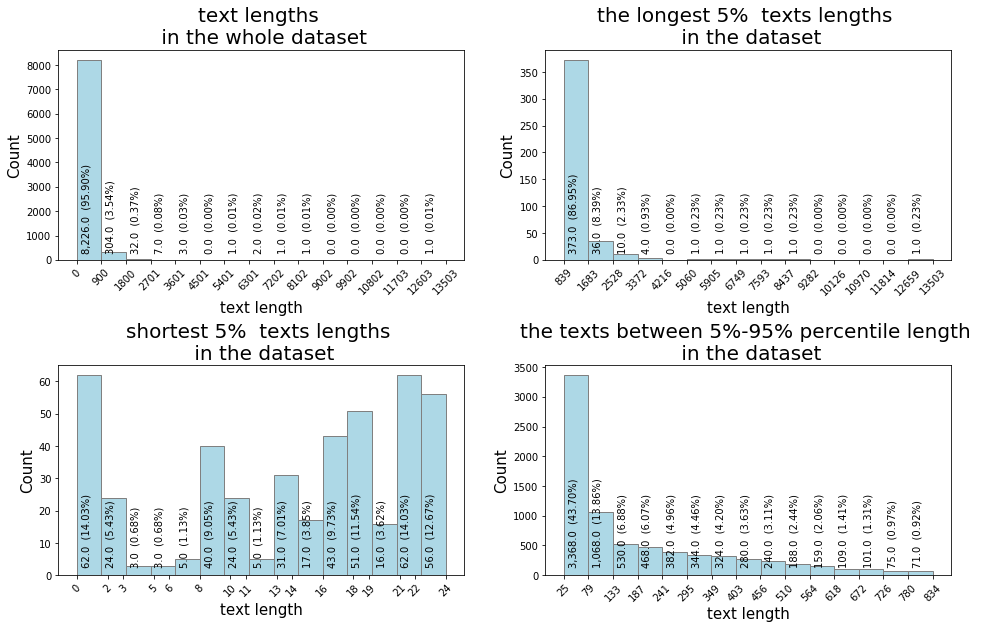

In [24]:
hist_with_perc(log_cols['textLength'], 15,'text lengths \n in the whole dataset','text length','Count','lightblue'
            , log_cols[log_cols['textLength']>=cut_val_top_length]['textLength'],15,'the longest 5%  texts lengths \n in the dataset'
            , log_cols[log_cols['textLength']<=cut_val_bottom_length]['textLength'],15,'shortest 5%  texts lengths \n in the dataset'
            , log_cols[(log_cols['textLength']<cut_val_top_length)&(log_cols['textLength']>cut_val_bottom_length)].textLength,15,'the texts between 5%-95% percentile length \n in the dataset')

**After analysis, need to decide to remove certain percent of the longest and shortest texts.**
Currently, plan to remove top 1% and bottom 2% of rows. 
<hr/>
*Remove the rows which have too long and too short texts code below*

In [25]:
#detect the number of rows that fall in top % and bottom %
top= 0.01
bottom = 0.02
cutoff_percent_top = round((int(log_cols.shape[0]) * top))
cutoff_percent_bottom = round((int(log_cols.shape[0]) * bottom))
print('Total number of rows in dataset:', str(log_cols.shape[0]))
print('Number of top '+str(round(top*100))+'% of the rows: ', str(cutoff_percent_top))
print('Number of bottom '+str(round(bottom*100))+'% of the rows: ', str(cutoff_percent_bottom))

value_Longest = log_cols.sort_values('textLength', ascending=False).head(cutoff_percent_top).iloc[cutoff_percent_top-1].textLength
value_shortest = log_cols.sort_values('textLength', ascending=True).head(cutoff_percent_bottom).iloc[cutoff_percent_bottom-1].textLength

print('length of the text, above which to filter out the rows: ', str(value_Longest))
print('length of the text, below which to filter out the rows: ', str(value_shortest))

#log_cols[log_cols['textLength']<=value_shortest].to_csv('shortest_3pct.csv')
#log_cols[log_cols['textLength']>=value_Longest].to_csv('longest_7pct.csv')

Total number of rows in dataset: 8578
Number of top 1% of the rows:  86
Number of bottom 2% of the rows:  172
length of the text, above which to filter out the rows:  1504
length of the text, below which to filter out the rows:  13


In [26]:
log_cut = log_cols[(log_cols['textLength']>value_shortest) & (log_cols['textLength']<value_Longest)]

<h3> 1.6 Combine all texts by developers </h3><br>
group the texts together that are manually written by the same developer in the same project. The whole texts willbe used as an input for third-party personality insights API. 

In [27]:

# loop through the projects, then through the authors and combine the texts written by the given author in the given project
# store the project, author and text data into series and form a data frame.

df_proj_name = []
df_user_name = []
df_user_text = []
df_texts_count = []
df_texts_length = []
df_words_in_text = []
for project in log_cut['project'].unique():
    for dev_user in log_cut[log_cut['project']==project]['author'].unique():
        user_txt = ''       
        texts_count = 0
        texts_length = 0
        words_in_text = 0
        curr_df = log_cut[(log_cut['project']==project) & (log_cut['author']==dev_user)]
        for index, row in curr_df.iterrows():
            user_txt = str(user_txt) + str(row['text']) + '. '
            texts_count = texts_count + 1
            texts_length = texts_length + len(row['text'])
            words_in_text = words_in_text + len(row['text'].split()) 
        df_proj_name.append(project)
        df_user_name.append(dev_user)
        df_user_text.append(user_txt)
        df_texts_count.append(texts_count)
        df_texts_length.append(texts_length)
        df_words_in_text.append(words_in_text)
    
user_text_combined = pd.DataFrame({'project':df_proj_name,
                   'user':df_user_name, 
                   'text':df_user_text,
                    'count_of_texts':df_texts_count,
                    'words_in_text':df_words_in_text,
                    'texts_length':df_texts_length})
     
user_text_combined.to_csv('user_text_combined.csv')
print(user_text_combined.shape)
user_text_combined.head(3)

(618, 6)


,project,user,text,count_of_texts,words_in_text,texts_length
0,xd,aliiqbal,Cant completely remove custom module after put...,1,9,64
1,xd,grussell,Custom conversion is broken. If the custom doe...,59,1891,11088
2,xd,dgarcia,If I try to use when developing a Spring XD mo...,1,30,152


**<font color="red">!!! Important notice</font>** IBM Watson says that minimum of 600 words are required for the proper personality report.

In [28]:
user_text_combined[user_text_combined['words_in_text']>=600].shape[0]

108

<h3>Combine the texts of the users, that are present in different projects.</h3>

get the unique users per Name(displayName), Email(emailAddress), Username(name), Project(project)

In [29]:
users_df = users[['displayName','emailAddress','name','project']]
users_df = users_df[['displayName','emailAddress','name','project']].drop_duplicates()

Merge the users dataframe with the user_texts dataframe with username and project code <br/>
Clean the email addresses, to match one normalized format.

In [30]:
user_all_texts_emails = pd.merge(user_text_combined, users_df, how = 'left',
                                   left_on = ['project', 'user'],
                                   right_on = ['project', 'name'])[['project','user','text','count_of_texts','words_in_text','texts_length','emailAddress']]
user_all_texts_emails['emailAddress'] = user_all_texts_emails['emailAddress'].str.replace(' dot org', '.org')
user_all_texts_emails['emailAddress'] = user_all_texts_emails['emailAddress'].str.replace(' dot io', '.io')
user_all_texts_emails['emailAddress'] = user_all_texts_emails['emailAddress'].str.replace(' dot me', '.me')
user_all_texts_emails['emailAddress'] = user_all_texts_emails['emailAddress'].str.replace(' dot com', '.com')
user_all_texts_emails['emailAddress'] = user_all_texts_emails['emailAddress'].str.replace(' dot fr', '.fr')
user_all_texts_emails['emailAddress'] = user_all_texts_emails['emailAddress'].str.replace(' dot ', '.')
user_all_texts_emails['emailAddress'] = user_all_texts_emails['emailAddress'].str.replace(' at ', '@')
user_all_texts_emails['emailAddress'] = user_all_texts_emails['emailAddress'].str.replace(' ', '')

Identify the users with emails, that are present in more than one project.<br/>
Identify the users with emails, that are present in only one project. <br />
identify the users with no emails.<br>
For the users that are present in more than one project, combine texts from all projects, and update the number of words/textlength columns.

In [31]:
users_proj = user_all_texts_emails[['user', 'emailAddress', 'project']].groupby(['user', 'emailAddress']).count()
users_proj.reset_index(level= [0,1], inplace=True)

users_with_duplicates = users_proj[users_proj['project']>1][['user', 'emailAddress']]
users_with_single = users_proj[users_proj['project']==1][['user', 'emailAddress']]
users_with_single_noemail=user_all_texts_emails[pd.isnull(user_all_texts_emails.emailAddress)==True][['user', 'emailAddress']]

for i in range(0, users_with_duplicates.shape[0]):
    user_name = users_with_duplicates.iloc[i]['user']
    user_email = users_with_duplicates.iloc[i]['emailAddress']   
    df = (user_all_texts_emails[(user_all_texts_emails['user']==user_name) & (user_all_texts_emails['emailAddress']==user_email)])
    text_=''
    count_of_texts_=0
    words_in_text_=0
    texts_length_=0
    for k in range(0, df.shape[0]):
        text_ = text_ + df.iloc[k]['text']
        count_of_texts_ = count_of_texts_ + df.iloc[k]['count_of_texts']
        words_in_text_ = words_in_text_ + df.iloc[k]['words_in_text']
        texts_length_ = texts_length_ + df.iloc[k]['texts_length']
    user_all_texts_emails.loc[(user_all_texts_emails['user']==user_name) 
                              & (user_all_texts_emails['emailAddress']==user_email), 'text']=text_
    user_all_texts_emails.loc[(user_all_texts_emails['user']==user_name) 
                              & (user_all_texts_emails['emailAddress']==user_email), 'count_of_texts']=count_of_texts_
    user_all_texts_emails.loc[(user_all_texts_emails['user']==user_name) 
                              & (user_all_texts_emails['emailAddress']==user_email), 'words_in_text']=words_in_text_
    user_all_texts_emails.loc[(user_all_texts_emails['user']==user_name) 
                              & (user_all_texts_emails['emailAddress']==user_email), 'texts_length']=texts_length_

Check, after these changes, how many users are valid for IBM Watson Personality Insights check

In [32]:
print('before these changes: ', user_text_combined[user_text_combined['words_in_text']>=600].shape[0], '\n',
      'after these changes: ', user_all_texts_emails[user_all_texts_emails['words_in_text']>=600].shape[0])

before these changes:  108 
 after these changes:  136


In [33]:
user_all_texts_emails[user_all_texts_emails['words_in_text']>=600].head()

,project,user,text,count_of_texts,words_in_text,texts_length,emailAddress
1,xd,grussell,Custom conversion is broken. If the custom doe...,59,1891,11088,grussell@gopivotal.com
3,xd,mark.pollack,Update Spring-AMQP to RabbitMQ Client to. Enab...,340,6429,38305,mpollack@gopivotal.com
4,xd,david_geary,"All modules that allow groovy (filter, script,...",7,886,5063,d.geary@sophiasearch.com
5,xd,dturanski,User provides a jar file exposing a custom bea...,57,1409,8615,dturanski@gopivotal.com
6,xd,sabby,Spring flo issue with unexpected char. As a de...,390,7131,41490,sanandan@pivotal.io


<h3> Identify duplicated users accounts and show the unique users that meet words coutn criteria of IBM Watson </h3>

Get the users with texts that match IBM Watson criteria - minimum 600 words. 

In [34]:
valid_user_texts = user_all_texts_emails[user_all_texts_emails['words_in_text']>=600]

In [35]:
print(valid_user_texts.shape[0])
valid_user_texts.head(3)

136


,project,user,text,count_of_texts,words_in_text,texts_length,emailAddress
1,xd,grussell,Custom conversion is broken. If the custom doe...,59,1891,11088,grussell@gopivotal.com
3,xd,mark.pollack,Update Spring-AMQP to RabbitMQ Client to. Enab...,340,6429,38305,mpollack@gopivotal.com
4,xd,david_geary,"All modules that allow groovy (filter, script,...",7,886,5063,d.geary@sophiasearch.com


Some users have emailAddress value missing ('NaN'), we need to transform NaN value to '-' to make sure duplicates and group_by functions work properly.

In [36]:
valid_user_texts.loc[pd.isnull(valid_user_texts.emailAddress)==True,'emailAddress'] = '-'
#valid_user_texts[['user','emailAddress']].drop_duplicates().to_csv('valid_users_unique.csv')
print('Total number of unique users in valid user texts dataset: ', valid_user_texts[['user','emailAddress']].drop_duplicates().shape[0])
valid_user_texts[['user','emailAddress']].drop_duplicates().head(3)

Total number of unique users in valid user texts dataset:  100


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,user,emailAddress
1,grussell,grussell@gopivotal.com
3,mark.pollack,mpollack@gopivotal.com
4,david_geary,d.geary@sophiasearch.com


Now, let's see the unique users per each project

In [37]:
#valid_user_texts.groupby(['project']).count().to_csv('project_users.csv')
valid_user_texts[['project', 'user']].groupby(['project']).count().sort_values('user', ascending=False)

,user
project,
tistud,33
timob,30
dnn,20
xd,15
mesos,12
nexus,11
apstud,10
mule,5


<h2>Prepare data for watson</h2>

Get the unique users and their texts.

In [38]:
valid_user_texts_unique = valid_user_texts[['user','emailAddress', 'text']].drop_duplicates()
print(valid_user_texts_unique.shape[0])
valid_user_texts_unique.head()

100


,user,emailAddress,text
1,grussell,grussell@gopivotal.com,Custom conversion is broken. If the custom doe...
3,mark.pollack,mpollack@gopivotal.com,Update Spring-AMQP to RabbitMQ Client to. Enab...
4,david_geary,d.geary@sophiasearch.com,"All modules that allow groovy (filter, script,..."
5,dturanski,dturanski@gopivotal.com,User provides a jar file exposing a custom bea...
6,sabby,sanandan@pivotal.io,Spring flo issue with unexpected char. As a de...


In [39]:
#valid_user_texts_unique.to_csv('valid_user_texts_unique.csv')

In [40]:
valid_user_texts_unique.head()

,user,emailAddress,text
1,grussell,grussell@gopivotal.com,Custom conversion is broken. If the custom doe...
3,mark.pollack,mpollack@gopivotal.com,Update Spring-AMQP to RabbitMQ Client to. Enab...
4,david_geary,d.geary@sophiasearch.com,"All modules that allow groovy (filter, script,..."
5,dturanski,dturanski@gopivotal.com,User provides a jar file exposing a custom bea...
6,sabby,sanandan@pivotal.io,Spring flo issue with unexpected char. As a de...


<h2> Get IBM Watson personality insight results </h2>

In [41]:
from __future__ import print_function
import json
from os.path import join, dirname
from ibm_watson import PersonalityInsightsV3
import csv
import os
from datetime import datetime

service = PersonalityInsightsV3(
    version='2017-10-13',
    ## url is optional, and defaults to the URL below. Use the correct URL for your region.
    url='https://gateway-lon.watsonplatform.net/personality-insights/api',
    iam_apikey='oUImnq_VXfyDypESNM8rmtJOpzUzg6Zsp_TnZxmwHotR')

'''
another account credentials:
BFsOsCFLvQgZHLicoAj_ywnJ_92h0ry0gTgKudmuDmjm
https://gateway-lon.watsonplatform.net/personality-insights/api
'''

'\nanother account credentials:\nBFsOsCFLvQgZHLicoAj_ywnJ_92h0ry0gTgKudmuDmjm\nhttps://gateway-lon.watsonplatform.net/personality-insights/api\n'

In [49]:
user_personalities = pd.DataFrame(columns=('user', 'emailAddress', 
                                           'openness', 'o_raw', 'o_sign',
                                           'conscientiousness', 'c_raw', 'c_sign',
                                           'extraversion', 'e_raw', 'e_sign',
                                           'agreeableness', 'a_raw', 'a_sign',
                                           'neuroticism', 'n_raw', 'n_sign'))

for i in range(0, valid_user_texts_unique.shape[0]):
    user_ = valid_user_texts_unique.iloc[i]['user']
    email_ = valid_user_texts_unique.iloc[i]['emailAddress']
    text_ = valid_user_texts_unique.iloc[i]['text']
    
    # define destination json structure Save input JSON file for each user 
    data = {}
    data['contentItems'] = []
    data['contentItems'].append({
        'content': text_,
        'contenttype': 'application/json',
        'created': datetime.now().toordinal(),
        'id': i,
        'language':'en',
        'user_name':user_,
        'email':email_
    })

    input_json_file = 'json_input/' + user_ + ';' + email_ + '.json'
    with open(input_json_file, 'w') as outfile:
        json.dump(data, outfile)

    # Call IBM Watson Personality Insights for each user 
    with open(join(dirname('__file__'), input_json_file)) as \
        profile_json:
        profile = service.profile(
        profile_json.read(),
        'application/json',
        raw_scores=True,
        consumption_preferences=False).get_result()

    # Save the personality insights result into output JSON file for each user
    output_json_file = 'json_output/' + user_ + ';' + email_ + '_result.json'
    with open(output_json_file, 'w') as outfile:
        json.dump(profile, outfile)
    
    # parse JSON, loop through each personality and get the scores
    personalities = []
    for p in range(0, 5):
        trait_id = profile['personality'][p]['name']
        percentile = profile['personality'][p]['percentile']
        significant = profile['personality'][p]['significant']
        raw_score = profile['personality'][p]['raw_score']

        if trait_id == 'Openness':
            big5_openness = percentile
            big5_o_raw = raw_score
            big5_o_sign = significant
        elif trait_id=='Conscientiousness':
            big5_conscientiousness = percentile
            big5_c_raw = raw_score
            big5_c_sign = significant
        elif trait_id == 'Extraversion':
            big5_extraversion = percentile
            big5_e_raw = raw_score
            big5_e_sign = significant
        elif trait_id == 'Agreeableness':
            big5_agreeableness = percentile
            big5_a_raw = raw_score
            big5_a_sign = significant
        elif trait_id == 'Emotional range':
            big5_neuroticism = percentile
            big5_n_raw = raw_score
            big5_n_sign = significant
    
    # Save the user personalities into dataset
    user_personalities = user_personalities.append([{
        'user':user_, 'emailAddress':email_, 
       'openness':big5_openness, 'o_raw':big5_o_raw, 'o_sign':big5_o_sign,
       'conscientiousness':big5_conscientiousness, 'c_raw':big5_c_raw, 'c_sign':big5_c_sign,
       'extraversion':big5_extraversion, 'e_raw':big5_e_raw, 'e_sign':big5_e_sign,
       'agreeableness':big5_agreeableness, 'a_raw':big5_a_raw, 'a_sign':big5_a_sign,
       'neuroticism':big5_neuroticism, 'n_raw':big5_n_raw, 'n_sign':big5_n_sign
    }])

<hr/><font color="red" size="4">**!!!** read about the raw scores here: </font> <pre>https://cloud.ibm.com/docs/services/personality-insights?topic=personality-insights-numeric#rawScores-numeric </pre><hr/> 

In [43]:
user_personalities=pd.read_csv('user_personalities.csv')

In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
user_personalities.to_csv('user_personalities.csv')
user_personalities.head()

,Unnamed: 0,Unnamed: 0.1,user,emailAddress,openness,o_raw,o_sign,conscientiousness,c_raw,c_sign,extraversion,e_raw,e_sign,agreeableness,a_raw,a_sign,neuroticism,n_raw,n_sign
0,0,0,grussell,grussell@gopivotal.com,0.970,0.809,True,0.339,0.609,True,0.126,0.500,True,0.000,0.590,True,0.102,0.446,True
1,1,0,mark.pollack,mpollack@gopivotal.com,0.945,0.800,True,0.525,0.631,True,0.072,0.486,True,0.000,0.605,True,0.234,0.487,True
2,2,0,david_geary,d.geary@sophiasearch.com,0.965,0.807,True,0.555,0.634,True,0.310,0.529,True,0.002,0.630,True,0.658,0.573,True
3,3,0,dturanski,dturanski@gopivotal.com,0.963,0.806,True,0.483,0.626,True,0.097,0.493,True,0.000,0.606,True,0.115,0.451,True
4,4,0,sabby,sanandan@pivotal.io,0.823,0.778,True,0.349,0.610,True,0.096,0.493,True,0.000,0.610,True,0.314,0.505,True


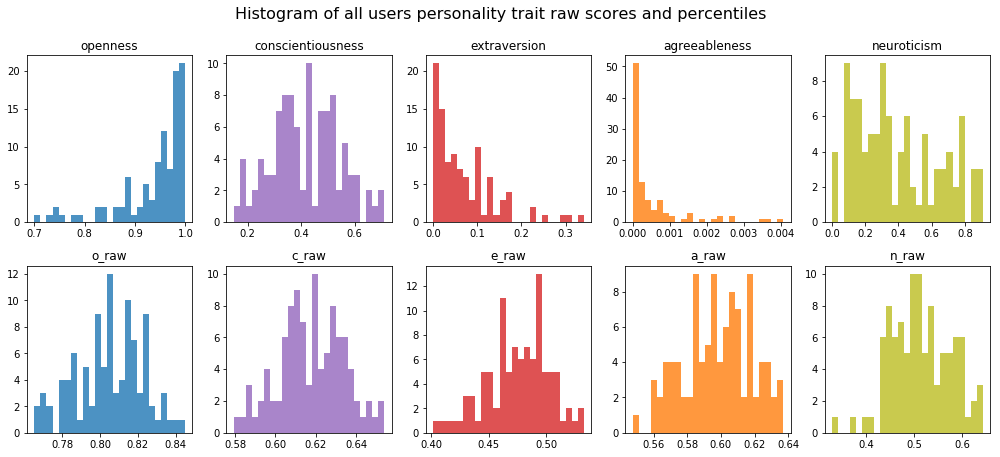

In [45]:
# Plot
fig, axes = plt.subplots(2, 5, figsize=(14,6), sharex=False, sharey=False)
colors = ['tab:blue', 'tab:purple', 'tab:red', 'tab:orange', 'tab:olive',
         'tab:blue', 'tab:purple', 'tab:red', 'tab:orange', 'tab:olive']
traits = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism',
         'o_raw', 'c_raw', 'e_raw', 'a_raw', 'n_raw']

for i, (axx, trait_) in enumerate(zip(axes.flatten(), traits)):
    x = user_personalities[trait_]
    axx.hist(x, alpha=0.8, bins=25, label=trait_, color=colors[i])
    axx.set_title(trait_)

plt.suptitle('Histogram of all users personality trait raw scores and percentiles', y=1.05, size=16)
plt.tight_layout();

join the personalities dataframe to projects 

In [46]:
user_personalities.head()
#valid_user_texts['project', 'user', 'emailAddress']
p_cols = ['project']
for col in user_personalities.columns:
    p_cols.append(col)
project_user_personalities = pd.merge(user_personalities, valid_user_texts, how = 'inner',
                                   left_on = ['user', 'emailAddress'],
                                   right_on = ['user', 'emailAddress'])[p_cols]

print(valid_user_texts.shape[0], project_user_personalities.shape[0])

136 136


Let's see the personality traits percentiles and raw scores distribution within the eight projects. <br>
Define and show the plot with the projects/percentiles and scores 

In [47]:
def boxpl(dt, x_cols, y_cols, title):
    n = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(18, 3.5 * x_cnt))
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(x_cnt, y_cnt, n)
            #ax.set_title(i)
            g = sns.boxplot(x = dt[x_ax], y = dt[i])
            g.set_xticklabels(g.get_xticklabels(), rotation=30)
            plt.suptitle(title, size=16)
            plt.subplots_adjust(bottom=0.15, wspace=0.4)
            n = n + 1

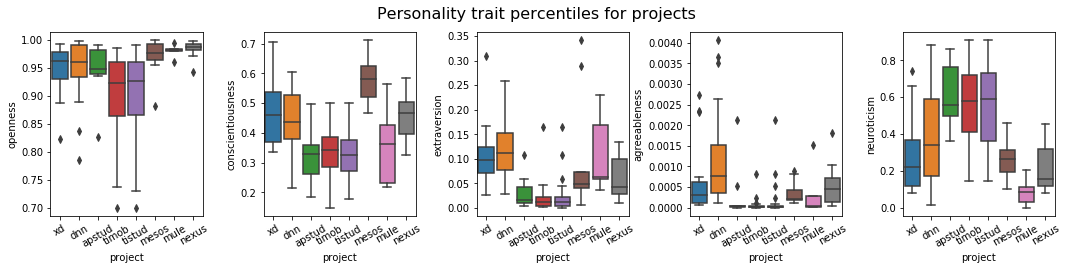

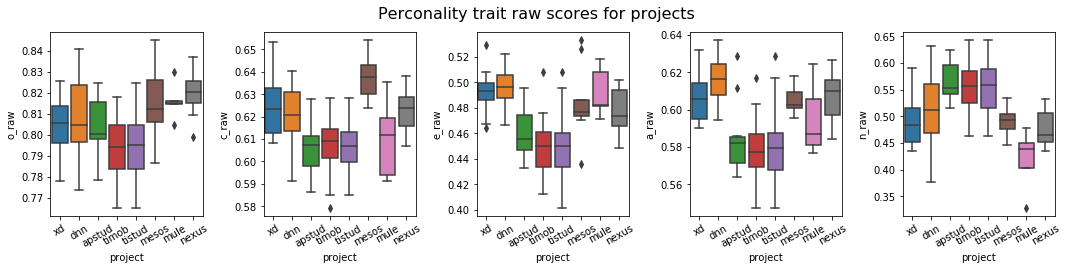

In [48]:
y_cols = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']
x_cols = ['project']
title = 'Personality trait percentiles for projects'
boxpl(project_user_personalities, x_cols, y_cols, title)

y_cols = ['o_raw', 'c_raw', 'e_raw', 'a_raw', 'n_raw']
x_cols = ['project']
title = 'Perconality trait raw scores for projects'
boxpl(project_user_personalities, x_cols, y_cols, title)

<h2> Calculation of metrics </h2>

<h3> Time </h3>

First, let's define the time spent per task by the developer: time that is passed while the task was set to 'In Progress' status.
In technical terms, this is the time between the two log records when 1) the task status was set to 'In Progress'
and 2)task status was changed from 'In Progress'. 


Get the records from Jira change log, that have status set from In Progress to something else, and the records that have set status set to In Progress from something else.

In [641]:
changelog_from_inprogress = changelog[(changelog['field']=='status') 
                                    & (changelog['fromString']=='In Progress')
                                    & (changelog['toString']!='In Progress')].reset_index()
changelog_to_inprogress = changelog[(changelog['field']=='status') 
                                    & (changelog['toString']=='In Progress') 
                                    & (changelog['fromString']!='In Progress')].reset_index()
changelog_to_inprogress.head()

,index,author,created,field,fieldtype,from,fromString,key,project,to,toString
0,0,jvalkeal,2016-03-03 18:40:53.171,status,jira,10000,To Do,XD-3751,xd,3,In Progress
1,12,grussell,2016-02-29 19:43:42.553,status,jira,10000,To Do,XD-3748,xd,3,In Progress
2,19,mark.pollack,2016-02-23 18:18:59.225,status,jira,10000,To Do,XD-3746,xd,3,In Progress
3,25,mark.pollack,2016-02-23 18:04:22.616,status,jira,10000,To Do,XD-3745,xd,3,In Progress
4,37,grussell,2016-02-22 15:49:30.944,status,jira,10000,To Do,XD-3744,xd,3,In Progress


let's join these two datasets, and have one row for each from-to in progress status record.
Technically: loop through each record where task status was changed form 'In Progress' to some other status (this record indicates that developer has stopped working on it). For each of these records, find the one latest record, where task status was set to 'In Progress' (this record indicates that developer has started working on it). With this operation we will get starting and ending time of work on the task by developer, and we will just need to calculate time difference.
<hr> In case when several developers have worked on one task - the function will calculate time for each of them separately.
<br> In case when one developer has set status to 'In Progress' multiple times within one task, the function will calculate the sum amount, so that one developer will have one number of minutes spent for one task. 

In [642]:
changelog_from_inprogress['prev_status'] = np.nan
changelog_from_inprogress['prev_status_created'] = np.nan
changelog_from_inprogress['created'] = pd.to_datetime(changelog_from_inprogress['created'])
changelog_to_inprogress['created'] = pd.to_datetime(changelog_to_inprogress['created'])

for index, row in changelog_from_inprogress.iterrows():
    _key = row['key']
    _project = row['project']
    _created = row['created']
    _to_row = changelog_to_inprogress[(((changelog_to_inprogress['key'] == _key)
                            & (changelog_to_inprogress['project'] == _project))
                            & (pd.to_datetime(changelog_to_inprogress['created']) < pd.to_datetime(_created)))].sort_values('created', ascending=False).head(1)
    for st in _to_row['fromString']:
        _prev_st = st 
    for cr in _to_row['created']:
        _prev_st_created = cr 
    
    changelog_from_inprogress.loc[index,'prev_status'] = _prev_st
    changelog_from_inprogress.loc[index,'prev_status_created'] = _prev_st_created

Calcualte minutes spent on each task

In [643]:
changelog_from_inprogress['minutes_spent']=(pd.to_datetime(changelog_from_inprogress['created'])
                            - pd.to_datetime(changelog_from_inprogress['prev_status_created'])) / np.timedelta64(1, 'm')
changelog_from_inprogress.head(3)

,index,author,created,field,fieldtype,from,fromString,key,project,to,toString,prev_status,prev_status_created,minutes_spent
0,2,jvalkeal,2016-03-03 18:41:19.429,status,jira,3,In Progress,XD-3751,xd,10006,In PR,To Do,2016-03-03 18:40:53.171000,0.438
1,14,grussell,2016-02-29 21:11:29.703,status,jira,3,In Progress,XD-3748,xd,10006,In PR,To Do,2016-02-29 19:43:42.553000,87.786
2,20,mark.pollack,2016-02-23 18:19:04.071,status,jira,3,In Progress,XD-3746,xd,10006,In PR,To Do,2016-02-23 18:18:59.225000,0.081


Sum up the time by the same users for the same tasks

In [649]:
user_key_timespent=changelog_from_inprogress.groupby(['key', 'project', 'author']).agg({'minutes_spent':'sum'})
user_key_timespent.reset_index(level= [0,1,2], inplace=True)

In [650]:
user_key_timespent.head(3)

,key,project,author,minutes_spent
0,APSTUD-1378,apstud,cwilliams,340.033
1,APSTUD-1469,apstud,mstepanov,121.633
2,APSTUD-1469,apstud,sgibly,54.717


In [651]:
user_key_timespent = user_key_timespent[user_key_timespent['minutes_spent']>0]

Let's join the time spendings dataset with the users dataset, that are valid for personality traits check.

In [652]:
valid_users_times = pd.merge(user_personalities, user_key_timespent, how = 'inner',
        left_on = 'user', right_on = 'author')[['user', 'emailAddress', 'project', 'key', 'minutes_spent']]

In [653]:
valid_users_times.head()

,user,emailAddress,project,key,minutes_spent
0,grussell,grussell@gopivotal.com,xd,XD-1127,0.578
1,grussell,grussell@gopivotal.com,xd,XD-1153,1452.161
2,grussell,grussell@gopivotal.com,xd,XD-1164,73.852
3,grussell,grussell@gopivotal.com,xd,XD-128,1688.373
4,grussell,grussell@gopivotal.com,xd,XD-1338,20246.750


In [654]:
print(user_personalities.shape[0], valid_users_times.shape[0])

100 8093


Based on the times spent by the developers, let's define the high, normal and low time spend categories.
First, let's find the values where to split the rows: first < 33.33% time spend - low time spending, from 33.33% to 66.66% medium time spent, and from 66.66% and more - high time spending.

In [683]:
_top_percentile=0.3109
_bottom_percentile=0.5139
_rownumber_within_top_percentile = round((int(valid_users_times.shape[0]) * _top_percentile))
_rownumber_within_bottom_percentile = round((int(valid_users_times.shape[0]) * _bottom_percentile))
_top_percentile_rows_filter_value_minutes = valid_users_times.sort_values('minutes_spent', ascending=False).head(_rownumber_within_top_percentile).iloc[_rownumber_within_top_percentile-1].minutes_spent
_bottom_percentile_rows_filter_value_minutes = valid_users_times.sort_values('minutes_spent', ascending=True).head(_rownumber_within_bottom_percentile).iloc[_rownumber_within_bottom_percentile-1].minutes_spent

print(_rownumber_within_top_percentile, _rownumber_within_bottom_percentile, _top_percentile_rows_filter_value_minutes, _bottom_percentile_rows_filter_value_minutes)
print('nr of rows from ', _bottom_percentile*100, '% to ',
      str(100-100*_top_percentile), '% : ',
      valid_users_times[(valid_users_times['minutes_spent']<_top_percentile_rows_filter_value_minutes) & 
                        ( valid_users_times['minutes_spent']>_bottom_percentile_rows_filter_value_minutes)].shape[0])

print('nr of rows above ', str(100-100*_top_percentile), '%: ',
      valid_users_times[valid_users_times['minutes_spent']>=_top_percentile_rows_filter_value_minutes].shape[0])

print('nr of rows below, ', _bottom_percentile*100, '%: ',
      valid_users_times[valid_users_times['minutes_spent']<=_bottom_percentile_rows_filter_value_minutes].shape[0])

print('Total number of rows in dataset: ', valid_users_times.shape[0])

2516 4159 2400.3375833333334 480.6338333333333
nr of rows from  51.39 % to  68.91 % :  1418
nr of rows above  68.91 %:  2516
nr of rows below,  51.39 %:  4159
Total number of rows in dataset:  8093


In [684]:
valid_users_times['time_spending_category'] = np.nan

valid_users_times.loc[(valid_users_times['minutes_spent']<_top_percentile_rows_filter_value_minutes) & 
                        ( valid_users_times['minutes_spent']>_bottom_percentile_rows_filter_value_minutes)
                  , 'time_spending_category'] = 'time_medium'

valid_users_times.loc[valid_users_times['minutes_spent']>=_top_percentile_rows_filter_value_minutes
                      , 'time_spending_category']='time_high'

valid_users_times.loc[valid_users_times['minutes_spent']<=_bottom_percentile_rows_filter_value_minutes
                      , 'time_spending_category']='time_low'
# check the actual values
valid_users_times[['time_spending_category', 'user']].groupby('time_spending_category').count()

,user
time_spending_category,
time_high,2516
time_low,4159
time_medium,1418


In [685]:
valid_users_times.head()

,user,emailAddress,project,key,minutes_spent,time_spending_category
0,grussell,grussell@gopivotal.com,xd,XD-1127,0.578,time_low
1,grussell,grussell@gopivotal.com,xd,XD-1153,1452.161,time_medium
2,grussell,grussell@gopivotal.com,xd,XD-1164,73.852,time_low
3,grussell,grussell@gopivotal.com,xd,XD-128,1688.373,time_medium
4,grussell,grussell@gopivotal.com,xd,XD-1338,20246.750,time_high


Now, let's group the data the following way: to have one record for each user, and columns will be number of tasks where the user had low, medium and high time spendings.

In [686]:
import pandasql as ps

q1 = """
Select U.user, low_timespent_tasks, medium_timespent_tasks, high_timespent_tasks
From 
    (
    Select distinct user From valid_users_times) AS U
    Left Join ( SELECT user, count(*) AS low_timespent_tasks
    FROM valid_users_times AS F WHERE time_spending_category = 'time_low' Group By user
    ) AS Low ON U.user = Low.user
    Left Join (SELECT user, count(*) AS medium_timespent_tasks
    FROM valid_users_times AS F WHERE time_spending_category = 'time_medium' Group By user
    ) AS medium on U.user = medium.user
    Left Join ( SELECT user, count(*) AS high_timespent_tasks
    FROM valid_users_times AS F WHERE time_spending_category = 'time_high' Group By user
    ) AS high ON U.user = high.user
"""

valid_user_time_agg = ps.sqldf(q1, locals())
print(valid_user_time_agg.shape[0])
valid_user_time_agg.head()

80


,user,low_timespent_tasks,medium_timespent_tasks,high_timespent_tasks
0,grussell,50.000,16.000,19.000
1,mark.pollack,97.000,61.000,152.000
2,dturanski,56.000,14.000,66.000
3,sabby,76.000,26.000,81.000
4,thomas.risberg,66.000,24.000,55.000


In [687]:
print(valid_user_time_agg[(pd.isnull(valid_user_time_agg['low_timespent_tasks'])==False)
                         & (pd.isnull(valid_user_time_agg['medium_timespent_tasks'])==False)
                         & (pd.isnull(valid_user_time_agg['high_timespent_tasks'])==False)].shape[0])

print(valid_user_time_agg[(pd.isnull(valid_user_time_agg['low_timespent_tasks'])==False)
                         | (pd.isnull(valid_user_time_agg['medium_timespent_tasks'])==False)
                         | (pd.isnull(valid_user_time_agg['high_timespent_tasks'])==False)].shape[0])

64
80


<h3>Categorical variable Metrics</h3>

Let's define the functions that will return the dataset of given metrics and their aggregates.

In [688]:
def categorical_metric(field, multiple_fields, field_in_issues, field_exclusion_filter, values_filter, cat1_list, cat1_label, cat2_list, cat2_label, cat3_list, cat3_label):
    #create table from the log with this specific field
    if len(multiple_fields)>0:
        log_dt = changelog[(changelog['field'].isin(multiple_fields))]
    else:
        log_dt = changelog[(changelog['field'].isin([field]))]
    
    #code when exclusion field values are passed
    if len(field_exclusion_filter) > 0:
        #merge to issues table and add the 
        log_dt = pd.merge(log_dt, issues[['key', field_in_issues]].drop_duplicates()
                     , how='inner', left_on = 'key', right_on='key')[['author', 'created', 'field', 'fieldtype', 'from', 'fromString', 'key',
                    'project', 'to', 'toString', field_in_issues]]
        log_dt = log_dt[log_dt[field_in_issues]!=field_exclusion_filter]
        log_dt = log_dt[log_dt['toString'].isin(values_filter)]
        
    #add new column to the previous log table for this field. Assign the values based on categories defined in list
    log_dt[field] = np.nan
    log_dt.loc[(log_dt.toString.isin(cat1_list)), field]=cat1_label
    log_dt.loc[(log_dt.toString.isin(cat2_list)), field]=cat2_label
    log_dt.loc[(log_dt.toString.isin(cat3_list)), field]=cat3_label
    
    #join table to user personalities table
    valid_users_metrics = pd.merge(user_personalities, log_dt, how = 'inner',
        left_on = 'user', right_on = 'author')[['user', 'emailAddress', 'project', 'key', 'created', field]]
    
    # take only the latest edit of the field by the user on the specific task
    #if field=='status':
    valid_users_metrics_grouped = valid_users_metrics.groupby(['user', 'emailAddress', 'project', 'key']).agg({'created':'max'})
    valid_users_metrics_grouped.reset_index(level= [0,1,2], inplace=True)
    valid_users_metrics_grouped2 = valid_users_metrics.groupby(['user', 'emailAddress', 'project', 'key', 'created']).agg({field:'max'})
    valid_users_metrics_grouped2.reset_index(level= [0,1,2,3], inplace=True)

    latest_valid_users_metrics = pd.merge(valid_users_metrics_grouped2, valid_users_metrics_grouped, how = 'inner',
                                       left_on = ['user', 'emailAddress', 'project', 'key', 'created'],
                                       right_on = ['user', 'emailAddress', 'project', 'key', 'created'])[
        ['user', 'emailAddress', 'project', 'key', field]]

    latest_valid_users_metrics = latest_valid_users_metrics.drop_duplicates()
    #else:
    #    latest_valid_users_metrics= valid_users_metrics#.drop_duplicates()
    return latest_valid_users_metrics
    
def categorical_metric_agg(data, field, cat1_label, cat2_label, cat3_label):
    valid_users_metrics = data
    #Aggregate the metrics per user
    agg_query = """ SELECT U.user,"""+cat1_label+""", """+cat2_label+""", """+cat3_label+""", 
    CASE WHEN COALESCE("""+cat1_label+""", 0)>=COALESCE("""+cat2_label+""", 0) AND COALESCE("""+cat1_label+""", 0)>=COALESCE("""+cat3_label+""", 0) THEN '"""+cat1_label+"""'
         WHEN COALESCE("""+cat2_label+""", 0)>=COALESCE("""+cat3_label+""", 0) AND COALESCE("""+cat2_label+""", 0)>=COALESCE("""+cat1_label+""", 0) THEN '"""+cat2_label+"""'
         WHEN COALESCE("""+cat3_label+""", 0)>=COALESCE("""+cat2_label+""", 0) AND COALESCE("""+cat3_label+""", 0)>=COALESCE("""+cat1_label+""", 0) THEN '"""+cat3_label+"""'
    END AS metric
    FROM (SELECT DISTINCT user FROM valid_users_metrics) AS U
    LEFT JOIN ( SELECT user, COUNT(*) AS """+cat1_label+""" FROM valid_users_metrics AS F WHERE """+field+""" = '"""+cat1_label+"""' GROUP BY user) AS T1 ON U.user = T1.user
    LEFT JOIN ( SELECT user, count(*) AS """+cat2_label+""" FROM valid_users_metrics AS F WHERE """+field+""" = '"""+cat2_label+"""' GROUP BY user) AS T2 on U.user = T2.user
    LEFT JOIN ( SELECT user, count(*) AS """+cat3_label+""" FROM valid_users_metrics AS F WHERE """+field+""" = '"""+cat3_label+"""' GROUP BY user) AS T3 ON U.user = T3.user
    """
    valid_users_metrics_agg = ps.sqldf(agg_query, locals())
    return valid_users_metrics_agg

<h2> State </h2>

First, let's check what statuses and status categories are present in issues and changelog datasets 

In [689]:
statuses = changelog[changelog['field']=='status'][['toString', 'author']].groupby(
    'toString').count().sort_values('author', ascending=False)
statuses.reset_index(level= [0], inplace=True)
statuses.head()

,toString,author
0,In Progress,11986
1,Closed,11236
2,Resolved,10583
3,Done,3201
4,Reopened,3171


Now, let's define our own categories and assign changelog abses status names to the ones we defined.
Then, create separate datasets for each of these defined statuses, by filtering the changelog dataset, and then aggregate these datasets to take only the user and the number of the rows.

In [690]:
_todo = ['To Do', 'Open', 'Reopened', 'Reviewable', 'To Be Merged', 'Scoped', 'Refine', 'New', 'Raw'
        , 'Waiting for Response', 'To Be Tested', 'Pending 3rd-Party', 'Defered', 'Triaged']
_inprogress = ['Pull Request Submitted', 'Planned Development', 'In Progress', 'In PR', 'In Review', 'In  Review'
               , 'Writing', 'Waiting for Review', 'Testing In Progress']
_done = ['Closed', 'Resolved', 'Done', 'Inactive - Pending Closure', 'Accepted']
states_df = categorical_metric('status','','','','',_todo,'status_todo',_inprogress,'status_inprogress',_done,'status_done')
states_df_agg = categorical_metric_agg(states_df, 'status','status_todo', 'status_inprogress', 'status_done')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._se

In [691]:
print(states_df.shape[0], 
      states_df.drop_duplicates().shape[0],
      states_df[['user', 'key']].drop_duplicates().shape[0])
states_df[['user','key','status']].groupby(['user','status']).count().reset_index().sort_values('key', ascending=False).head(100)

query="""
SELECT s.*, g.keys_count, g.keys_to_delete, CASE WHEN g.keys_to_delete >= s.RowNum THEN 'Yes' ELSE 'No' END as ToDelete
FROM (SELECT *, ROW_NUMBER() OVER(PARTITION BY user, emailAddress, project, status ORDER BY 1) AS RowNum
FROM states_df) AS s
INNER JOIN (SELECT user, emailAddress, project, status, COUNT(*) AS keys_count, CAST(COUNT(*)*0.5 AS INT) AS keys_to_delete
FROM states_df GROUP BY user, emailAddress, project, status) AS g
ON g.user = s.user AND g.emailAddress = s.emailAddress AND g.project = s.project AND s.status = g.status
"""
states_df = ps.sqldf(query, locals())
print(states_df[states_df['ToDelete']=='Yes'].shape[0], states_df[states_df['ToDelete']=='Yes'].shape[0])
states_df = states_df[states_df['ToDelete']=='No'].copy(deep=True)

21585 21585 21585
10701 10701


In [386]:
#states_df[states_df['ToDelete']=='No'].shape[0]


In [436]:
states_df.shape[0]

8784

Check how many from these users have all three status tasks available, or at least one status task available:

In [692]:
print(states_df_agg[(pd.isnull(states_df_agg['status_done'])==False)
                         & (pd.isnull(states_df_agg['status_todo'])==False)
                         & (pd.isnull(states_df_agg['status_inprogress'])==False)].shape[0])

print(states_df_agg[(pd.isnull(states_df_agg['status_done'])==False)
                         | (pd.isnull(states_df_agg['status_todo'])==False)
                         | (pd.isnull(states_df_agg['status_inprogress'])==False)].shape[0])
states_df_agg.head()

69
97


,user,status_todo,status_inprogress,status_done,metric
0,Alexey.tregub,9.000,5.000,255.000,status_done
1,KenGrierson,23.000,6.000,274.000,status_done
2,adam-mesos,5.000,6.000,93.000,status_done
3,agrueso,4.000,39.000,86.000,status_done
4,agx,2.000,19.000,36.000,status_done


<h2> Task Prioritization <h/2>

Let's see what are the priority values in changelog dataset, and how many records has each of these priority value

In [693]:
changelog[changelog['field']=='priority'][['toString', 'author']].groupby(
    'toString').count().sort_values('author', ascending=False)

,author
toString,
High,1978
Medium,1267
Critical,1031
Major,742
Low,670
Blocker,254
Minor,240
None,166
Trivial,89


Let's define our own priority categories and assign changelog priority names to the ones we defined. 
Then, create separate datasets for each of these defined priorities, by filtering the changelog dataset, and then aggregate these datasets to take only the user and the number of the rows.

In [416]:
_high = ['High', 'Critical', 'Blocker']
_medium = ['Medium', 'Major']
_low = ['Low', 'Minor', 'None', 'Trivial', 'To be reviewed']

priorities_df = categorical_metric('priority','','','','',_high,'priority_high',_medium,'priority_medium',_low,'priority_low')
priorities_df_agg = categorical_metric_agg(priorities_df, 'priority','priority_high', 'priority_medium', 'priority_low')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._se

In [417]:
print(priorities_df.shape[0], 
      priorities_df.drop_duplicates().shape[0],
      priorities_df[['user', 'key']].drop_duplicates().shape[0])
priorities_df.head()

4796 4796 4796


,user,emailAddress,project,key,priority
0,Alexey.tregub,-,dnn,DNN-3344,priority_high
1,Alexey.tregub,-,dnn,DNN-3957,priority_high
2,Alexey.tregub,-,dnn,DNN-3966,priority_high
3,Alexey.tregub,-,dnn,DNN-4117,priority_medium
4,KenGrierson,-,dnn,DNN-3445,priority_high


Check how many from these users have all three priority tasks available, and the number of users that have at least one piroritization available

In [418]:
print(priorities_df_agg[(pd.isnull(priorities_df_agg['priority_high'])==False)
                         & (pd.isnull(priorities_df_agg['priority_medium'])==False)
                         & (pd.isnull(priorities_df_agg['priority_low'])==False)].shape[0])

print(priorities_df_agg[(pd.isnull(priorities_df_agg['priority_high'])==False)
                         | (pd.isnull(priorities_df_agg['priority_medium'])==False)
                         | (pd.isnull(priorities_df_agg['priority_low'])==False)].shape[0])
priorities_df_agg.head()

31
81


,user,priority_high,priority_medium,priority_low,metric
0,Alexey.tregub,3.000,1.000,nan,priority_high
1,KenGrierson,15.000,1.000,nan,priority_high
2,adam-mesos,8.000,2.000,2.000,priority_high
3,agrueso,nan,1.000,nan,priority_medium
4,alejandro.nosenzo,2.000,nan,4.000,priority_low


<h2>Estimation</h2>

[Text(0, 0.5, 'apstud'),
 Text(0, 1.5, 'dnn'),
 Text(0, 2.5, 'mesos'),
 Text(0, 3.5, 'mule'),
 Text(0, 4.5, 'nexus'),
 Text(0, 5.5, 'timob'),
 Text(0, 6.5, 'tistud'),
 Text(0, 7.5, 'xd')]

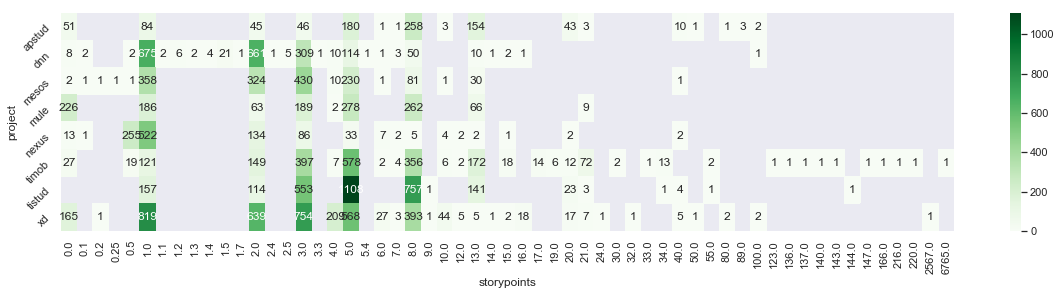

In [419]:
unique_keys = issues[['key', 'project', 'storypoints', 'fields.issuetype.name']].drop_duplicates()
proj_story_tab = pd.crosstab(unique_keys['project'], unique_keys['storypoints'], values = unique_keys['key'], aggfunc='count')
hm = sns.set(rc={'figure.figsize':(20,4)})
g = sns.heatmap(proj_story_tab, annot=True, cmap='Greens', fmt='g')
g.set_yticklabels(g.get_yticklabels(), rotation=45)

In [482]:
#field_in_issues, field_exclusion_filter, values_filter

story_points = ['0', '0.5', '1', '2', '3', '5', '8', '13', '20', '40', '100']
story_fields = ['Story Points', 'Actual Story Points']
field = 'StoryPoints'
e_low = ['0', '0.5', '1', '2']
e_medium = ['2', '3']
e_high = ['5', '8', '13', '20', '40', '100']


estimates_df = categorical_metric(field,story_fields,'fields.issuetype.name','Epic',story_points,e_high,'estimation_high',e_medium,'estimation_medium',e_low,'estimation_low')
estimates_df_agg = categorical_metric_agg(estimates_df, '`'+field+'`','estimation_high', 'estimation_medium', 'estimation_low')

In [483]:
estimates_df.head()

,user,emailAddress,project,key,StoryPoints
0,adam-mesos,adam@mesosphere.io,mesos,MESOS-1733,estimation_high
1,adam-mesos,adam@mesosphere.io,mesos,MESOS-2043,estimation_high
2,adam-mesos,adam@mesosphere.io,mesos,MESOS-2110,estimation_high
3,adam-mesos,adam@mesosphere.io,mesos,MESOS-2222,estimation_medium
4,adam-mesos,adam@mesosphere.io,mesos,MESOS-2315,estimation_low


In [484]:
print(estimates_df.shape[0],estimates_df[['user', 'key']].drop_duplicates().shape[0])

6840 6840


In [486]:
print(estimates_df_agg.shape[0], 
      changelog[(changelog['field'].isin(story_fields)) & (changelog['author']=='grussell')]['key'].drop_duplicates().shape[0])

76 64


In [487]:
print(estimates_df_agg[(pd.isnull(estimates_df_agg['estimation_high'])==False)
                         & (pd.isnull(estimates_df_agg['estimation_medium'])==False)
                         & (pd.isnull(estimates_df_agg['estimation_low'])==False)].shape[0])

print(estimates_df_agg[(pd.isnull(estimates_df_agg['estimation_high'])==False)
                         | (pd.isnull(estimates_df_agg['estimation_medium'])==False)
                         | (pd.isnull(estimates_df_agg['estimation_low'])==False)].shape[0])

56
76


<h2>Association Rules</h2>

<h4>Prepare datasets for association rule mining</h4>

In [93]:
from apyori import apriori

Define the commonly used functions:
<ul>
<li>function that will be used to generate association rules of two specified variables from dataframe. </li>
<li>function that returns all the association rules of one specific metric</li>
<li>funtion that plots support, confidence and lift results for the given association rules dataset</li>
</ul>

In [77]:
def get_association_rules_df(items_df,var1, var2, min_support_, min_confidence_, filter_twosets):
    items = items_df[[var1,var2]].values
    rules = apriori(items, min_support = min_support_, min_confidence = min_confidence_)
    rules_list = list(rules)
    assoc_df = pd.DataFrame(columns =(['antescedent', 'consequent', 'support', 'confidence', 'lift', 'inverse_rule_confidence']))
    for relation_recordset in rules_list:
        for rel_recordset_element in relation_recordset[2]:
            element_nr = 0
            for order_statistics in list(rel_recordset_element):
                if element_nr == 0:  antescedent= str(list(order_statistics))
                elif element_nr == 1:consequent = str(list(order_statistics))
                elif element_nr == 2:confidence = order_statistics
                elif element_nr == 3:lift = order_statistics
                element_nr = element_nr + 1 
            assoc_df = assoc_df.append({'antescedent':antescedent, 'consequent': consequent, 'support':relation_recordset[1]
                                        , 'confidence': confidence, 'lift':lift, 'inverse_rule_confidence':'-'}
                               ,  ignore_index = True)    
    if filter_twosets==True:
        assoc_df=assoc_df[assoc_df['antescedent']!='[]']
    return assoc_df.sort_values('antescedent', ascending = False)

def get_all_metric_associations(items_df, metric, min_support_, min_confidence_, filter_twosets):
    df = pd.DataFrame(columns =(['antescedent', 'consequent', 'support', 'confidence', 'lift', 'inverse_rule_confidence']))
    for col in items_df.columns:
        if (col!='user') & (col!=metric):
            df_=get_association_rules_df(items_df, metric, col, min_support_, min_confidence_, filter_twosets)
            sql_query="SELECT * FROM df_ UNION ALL SELECT * FROM df"
            df = ps.sqldf(sql_query, locals())
    return df

def heatmap_rule_stats(df, min_support_=0, min_confidence_=0):
    df = df[(df['support']>=min_support_) & (df['confidence']>=min_confidence_)]
    if df.shape[0]>0:
        tab_df = df
        tab_sup = pd.crosstab(tab_df['antescedent'], tab_df['consequent'], values = round(tab_df['support'], 2), aggfunc='max')
        tab_conf = pd.crosstab(tab_df['antescedent'], tab_df['consequent'], values = round(tab_df['confidence'], 2), aggfunc='max')
        tab_lif = pd.crosstab(tab_df['antescedent'], tab_df['consequent'], values = round(tab_df['lift'], 2), aggfunc='max')
        colors = ['Blues', 'BuPu', 'YlGnBu']
        i=1
        fig = plt.figure(figsize=(18, 14))
        for var in (['support', 'confidence', 'lift']):
            fig.add_subplot(2,2,i)
            if var=='support':src_tab = tab_sup 
            elif var=='confidence':src_tab = tab_conf
            elif var=='lift':src_tab = tab_lif
            g = sns.heatmap(src_tab, annot=True, cmap=colors[i-1], fmt='g')
            plt.title(var, fontsize=15)
            plt.subplots_adjust(bottom=0.15, hspace=0.8, wspace = 0.4)
            i=i+1
    else:
        print('No associations match min support and confidence criteria')

<ul> 
    <li>define the binary variables (yes-no) for each personality trait based on the mean value of given personality trait.</li>
    <li>Check number of users that get assigned positive or negative binary value for each personality trait.</li> 
</ul>

In [694]:
user_personalities['Is_open']           =user_personalities['o_raw'].apply(          lambda x: 'Yes_openness' if x>np.mean(user_personalities['o_raw'])          else 'No_openness')
user_personalities['Is_conscientious'] =user_personalities['c_raw'].apply( lambda x: 'Yes_conscientiousness' if x>np.mean(user_personalities['c_raw']) else 'No_conscientiousness')
user_personalities['Is_extravert']      =user_personalities['e_raw'].apply(      lambda x: 'Yes_extraversion' if x>np.mean(user_personalities['e_raw'])      else 'No_extraversion')
user_personalities['Is_agreeable']     =user_personalities['a_raw'].apply(     lambda x: 'Yes_agreeableness' if x>np.mean(user_personalities['a_raw'])     else 'No_agreeableness')
user_personalities['Is_neurotic']       =user_personalities['n_raw'].apply(       lambda x: 'Yes_neuroticism' if x>np.mean(user_personalities['n_raw'])       else 'No_neuroticism')

print(user_personalities[['Is_open', 'user']].groupby('Is_open').count(),'\n',
user_personalities[['Is_conscientious', 'user']].groupby('Is_conscientious').count(),'\n',
user_personalities[['Is_extravert', 'user']].groupby('Is_extravert').count(),'\n',
user_personalities[['Is_agreeable', 'user']].groupby('Is_agreeable').count(),'\n',
user_personalities[['Is_neurotic', 'user']].groupby('Is_neurotic').count())

query = """SELECT U.user FROM user_personalities AS U
INNER JOIN (SELECT DISTINCT user FROM estimates_df) AS E on U.user = E.user
INNER JOIN (SELECT DISTINCT user FROM priorities_df) AS P on U.user = P.user
INNER JOIN (SELECT DISTINCT user FROM states_df) AS S on U.user = S.user
INNER JOIN (SELECT DISTINCT user FROM valid_users_times) AS T on U.user = T.user
"""
all_mterics_available_users = ps.sqldf(query, locals())
print(all_mterics_available_users.shape[0])


              user
Is_open           
No_openness     50
Yes_openness    50 
                        user
Is_conscientious           
No_conscientiousness     48
Yes_conscientiousness    52 
                   user
Is_extravert          
No_extraversion     47
Yes_extraversion    53 
                    user
Is_agreeable           
No_agreeableness     50
Yes_agreeableness    50 
                  user
Is_neurotic          
No_neuroticism     54
Yes_neuroticism    46
60


Check number of rows for each jira metirc in total and number of unique users that have available data for this specific metric.

In [870]:
print('estimates_df---', 'total nr of records: ', estimates_df.shape[0], '; unique users: ',estimates_df.user.drop_duplicates().shape[0])
print('priorities_df---', 'total nr of records: ',priorities_df.shape[0], '; unique users: ',priorities_df.user.drop_duplicates().shape[0])
print('states_df---', 'total nr of records: ',states_df.shape[0], '; unique users: ',states_df.user.drop_duplicates().shape[0])
print('valid_users_times---', 'total nr of records: ',valid_users_times.shape[0], '; unique users: ',valid_users_times.user.drop_duplicates().shape[0])

estimates_df--- total nr of records:  6840 ; unique users:  76
priorities_df--- total nr of records:  4796 ; unique users:  81
states_df--- total nr of records:  10884 ; unique users:  97
valid_users_times--- total nr of records:  8093 ; unique users:  80


Merge all metrics dataframe with the user personality dataframe to assign each of five personality trait results to each user. 

In [871]:
estimates_assoc_df = pd.merge(user_personalities, estimates_df, how='inner', left_on = 'user', right_on = 'user')[[
    'user','StoryPoints','Is_open','Is_conscientious', 'Is_extravert', 'Is_agreeable', 'Is_neurotic']] 
priorities_assoc_df = pd.merge(user_personalities, priorities_df, how='inner', left_on = 'user', right_on = 'user')[[
    'user','priority','Is_open','Is_conscientious', 'Is_extravert', 'Is_agreeable', 'Is_neurotic']] 
states_assoc_df = pd.merge(user_personalities, states_df, how='inner', left_on = 'user', right_on = 'user')[[
    'user','status','Is_open','Is_conscientious', 'Is_extravert', 'Is_agreeable', 'Is_neurotic']] 
times_assoc_df = pd.merge(user_personalities, valid_users_times, how='inner', left_on = 'user', right_on = 'user')[[
    'user','time_spending_category','Is_open','Is_conscientious', 'Is_extravert', 'Is_agreeable', 'Is_neurotic']]

Check if by some reason any of the metrics have null values, and if yes, remove them.

In [872]:
print(estimates_assoc_df[pd.isnull(estimates_assoc_df['StoryPoints'])==True].shape[0],
      priorities_assoc_df[pd.isnull(priorities_assoc_df['priority'])==True].shape[0],
      states_assoc_df[pd.isnull(states_assoc_df['status'])==True].shape[0],
      times_assoc_df[pd.isnull(times_assoc_df['time_spending_category'])==True].shape[0])

priorities_assoc_df = priorities_assoc_df[pd.isnull(priorities_assoc_df['priority'])==False]

0 1 0 0


Transform netrics datasets into the lists, to be compatible with association rules library functions. take only antescedent and consequent values. 

In [698]:
estimates_assoc_openness = estimates_assoc_df[[
    'StoryPoints','Is_open']].values
estimates_assoc_conscientiousness = estimates_assoc_df[[
    'StoryPoints','Is_conscientious']].values
estimates_assoc_extraversion = estimates_assoc_df[[
    'StoryPoints', 'Is_extravert']].values
estimates_assoc_agreeableness = estimates_assoc_df[[
    'StoryPoints','Is_agreeable']].values
estimates_assoc_neuroticism = estimates_assoc_df[[
    'StoryPoints','Is_neurotic']].values

Create a separate dataframe for each personality trait. Each dataframe will contain all the metrics for one given trait.
<br> for example, `o_all` is the two column dataset: openness personality result, and all the JIRA metric resutls.

In [699]:
traits = ['Is_open', 'Is_conscientious', 'Is_extravert', 'Is_agreeable', 'Is_neurotic']
for trait in traits:
    query="""
    SELECT time_spending_category AS metric, """+trait+""" as trait  FROM times_assoc_df 
    UNION ALL SELECT StoryPoints, """+trait+""" FROM estimates_assoc_df 
    UNION ALL SELECT priority, """+trait+""" FROM priorities_assoc_df 
    UNION ALL SELECT status, """+trait+""" FROM states_assoc_df"""
    if trait=='Is_open':o_all = ps.sqldf(query, locals())
    elif trait=='Is_conscientious':c_all = ps.sqldf(query, locals())
    elif trait=='Is_extravert':e_all = ps.sqldf(query, locals())
    elif trait=='Is_agreeable':a_all = ps.sqldf(query, locals())
    elif trait=='Is_neurotic':n_all = ps.sqldf(query, locals())

Now use predefined association rules function to create dataframe of association rules results for each of the above created personality trait. <br> Note, that min_confidence and min_support is minimum, to NOT exclude any association. Filtering association rule results will be performed on the later parts of this file.

In [700]:
o_all_rules = get_association_rules_df(o_all,'metric','trait', 0.00001, 0.00001, True)
c_all_rules = get_association_rules_df(c_all,'metric','trait', 0.00001, 0.00001, True)
e_all_rules = get_association_rules_df(e_all,'metric','trait', 0.00001, 0.00001, True)
a_all_rules = get_association_rules_df(a_all,'metric','trait', 0.00001, 0.00001, True)
n_all_rules = get_association_rules_df(n_all,'metric','trait', 0.00001, 0.00001, True)

Let\`s run the predefined heatmap function to see all the results: support, confidence, lift of the all the associations rule generated by a given personality trait.

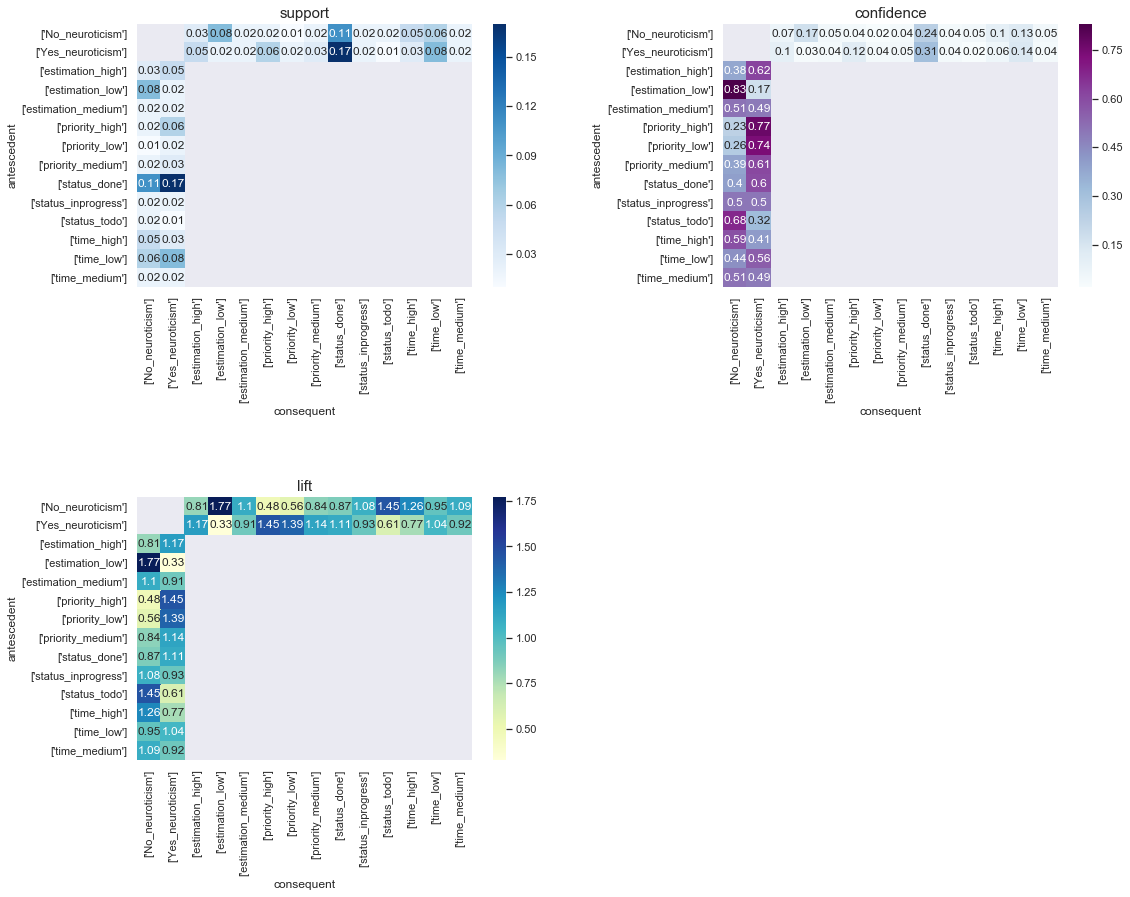

In [873]:
heatmap_rule_stats(n_all_rules, min_support_=0.00001, min_confidence_=0.00001)

<h3> Load Scott`s rules and make it ready to cross-check </h3>

Let's load 2 datasets from csv files:
<br> &nbsp;&nbsp;&nbsp;    1) original association rules from Scott's paper, that contains Felder-Silvermann Learning Styles(FSLM) model measures vs scrum metrics
<br> &nbsp;&nbsp;&nbsp;    2) correlation of the FSLM model measures mentioned above vs big 5 personality traits, frmo the paper of Siddiquei

In [874]:
big5_fslm_corr = pd.read_csv('fslm_big5_corr.csv')
rules_of_scott_orig = pd.read_csv('Rules_of_scott_orig.csv')


Let's combine these two datasets, instead of FSLM model measures we'll use the correlated big5 traits (correlation from Siddiquei's paper).<br>
Since some of FSLM measurement has 2 correlated trait from big5, we'll make two combined datasets:<br>&nbsp;&nbsp;&nbsp;&nbsp; first - with multirows, where there is extra row for the FSLM measures that has 2 correlated traits, <br>&nbsp;&nbsp;&nbsp;&nbsp; second - with multicolumn, where there is extra column for the FSLM measures that has 2 correlated traits.


In [875]:

query="""SELECT R1.fslm, R1.big5 AS trait1, R2.big5 as trait2
FROM (
SELECT *, Row_Number() OVER(PARTITION BY fslm) As Rank
FROM big5_fslm_corr) AS R1
LEFT JOIN
(SELECT *, Row_Number() OVER(PARTITION BY fslm) As Rank
FROM big5_fslm_corr) AS R2 ON R1.fslm = R2.fslm and R2.Rank = 2
WHERE R1.Rank = 1"""
corr_multicolumn = ps.sqldf(query, locals())

query="""SELECT *
, CASE WHEN SUBSTR(R1.antescedent,1,2)="[\'" THEN "metric" ELSE "trait" END AS antescedent_type
FROM rules_of_scott_orig AS R1
LEFT JOIN corr_multicolumn AS C ON R1.antescedent = C.fslm OR R1.consequent = C.fslm"""
rules_to_check_multicolumn =ps.sqldf(query, locals())


query="""SELECT *
, CASE WHEN 
    (CASE WHEN SUBSTR(R1.antescedent,1,2)="[\'" THEN "metric" ELSE "trait" END)='trait' THEN C.big5 ELSE R1.antescedent END as ant
, CASE WHEN 
    ((CASE WHEN SUBSTR(R1.antescedent,1,2)="[\'" THEN "metric" ELSE "trait" END))='trait' THEN R1.consequent ELSE C.big5 END as cons 
, CASE WHEN SUBSTR(R1.antescedent,1,2)="[\'" THEN "metric" ELSE "trait" END AS antescedent_type
FROM rules_of_scott_orig AS R1
LEFT JOIN big5_fslm_corr AS C ON R1.antescedent = C.fslm OR R1.consequent = C.fslm"""
rules_to_check_multirow =ps.sqldf(query, locals())

In [878]:
print(rules_to_check_multicolumn.shape[0])
rules_to_check_multirow.head(3)

21


,antescedent,consequent,fslm,big5,ant,cons,antescedent_type
0,['time_low'],intuitive,intuitive,['No_agreeableness'],['time_low'],['No_agreeableness'],metric
1,['time_low'],intuitive,intuitive,['Yes_conscientiousness'],['time_low'],['Yes_conscientiousness'],metric
2,intuitive,['time_low'],intuitive,['No_agreeableness'],['No_agreeableness'],['time_low'],trait


In [879]:
print(rules_to_check_multirow.shape[0])
rules_to_check_multicolumn.head(3)

34


,antescedent,consequent,fslm,trait1,trait2,antescedent_type
0,['time_low'],intuitive,intuitive,['No_agreeableness'],['Yes_conscientiousness'],metric
1,intuitive,['time_low'],intuitive,['No_agreeableness'],['Yes_conscientiousness'],trait
2,sensing,['time_high'],sensing,['Yes_agreeableness'],['Yes_conscientiousness'],trait


Now, let\`s join our predefined multirow and multicolumn rules datasets with the dataset of each trait\`s association rules results 

In [881]:
query="""
SELECT R.fslm
, CASE WHEN R.antescedent_type='trait' THEN R.trait1 ELSE R.antescedent END AS antescedent
, CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait1 END AS consequent
, COALESCE(O.support, C.support, E.support, A.support, N.support) AS support1
, COALESCE(O.confidence, C.confidence, E.confidence, A.confidence, N.confidence) AS confidence1
, COALESCE(O.lift, C.lift, E.lift, A.lift, N.lift) AS lift1
, CASE WHEN R.trait2 IS NOT NULL THEN CASE WHEN R.antescedent_type='trait' THEN R.trait2 ELSE R.antescedent END END AS antescedent2
, CASE WHEN R.trait2 IS NOT NULL THEN CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait2 END END AS consequent2
, COALESCE(O2.support, C2.support, E2.support, A2.support, N2.support) AS support2
, COALESCE(O2.confidence, C2.confidence, E2.confidence, A2.confidence, N2.confidence) AS confidence2
, COALESCE(O2.lift, C2.lift, E2.lift, A2.lift, N2.lift) AS lift2
FROM rules_to_check_multicolumn AS R
LEFT JOIN o_all_rules AS O ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait1 ELSE R.antescedent END = O.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait1 END = O.consequent
LEFT JOIN o_all_rules AS O2 ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait2 ELSE R.antescedent END = O2.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait2 END = O2.consequent
LEFT JOIN c_all_rules AS C ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait1 ELSE R.antescedent END = C.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait1 END = C.consequent
LEFT JOIN c_all_rules AS C2 ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait2 ELSE R.antescedent END = C2.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait2 END = C2.consequent
LEFT JOIN e_all_rules AS E ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait1 ELSE R.antescedent END = E.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait1 END = E.consequent
LEFT JOIN e_all_rules AS E2 ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait2 ELSE R.antescedent END = E2.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait2 END = E2.consequent
LEFT JOIN a_all_rules AS A ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait1 ELSE R.antescedent END = A.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait1 END = A.consequent
LEFT JOIN a_all_rules AS A2 ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait2 ELSE R.antescedent END = A2.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait2 END = A2.consequent
LEFT JOIN n_all_rules AS N ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait1 ELSE R.antescedent END = N.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait1 END = N.consequent
LEFT JOIN n_all_rules AS N2 ON 
        CASE WHEN R.antescedent_type='trait' THEN R.trait2 ELSE R.antescedent END = N2.antescedent
        AND CASE WHEN R.antescedent_type='trait' THEN R.consequent ELSE R.trait2 END = N2.consequent
"""
rules_checked_multicolumn = ps.sqldf(query, locals())

query="""
SELECT R.ant AS antescedent
, R.cons AS consequent
, R.fslm
, R.antescedent_type
, COALESCE(O.support, C.support, E.support, A.support, N.support) AS support
, COALESCE(O.confidence, C.confidence, E.confidence, A.confidence, N.confidence) AS confidence
, COALESCE(O.lift, C.lift, E.lift, A.lift, N.lift) AS lift
FROM rules_to_check_multirow AS R
LEFT JOIN o_all_rules AS O ON R.ant = O.antescedent AND R.cons= O.consequent
LEFT JOIN c_all_rules AS C ON R.ant = C.antescedent AND R.cons= C.consequent
LEFT JOIN e_all_rules AS E ON R.ant = E.antescedent AND R.cons= E.consequent
LEFT JOIN a_all_rules AS A ON R.ant = A.antescedent AND R.cons= A.consequent
LEFT JOIN n_all_rules AS N ON R.ant = N.antescedent AND R.cons= N.consequent
"""
rules_checked_multirow = ps.sqldf(query, locals())

<h2> Case Study Results </h2> <br>
Now, let\`s see how many of the predefined rules from Scott\`s paper have been proven by the big 5 association rules

First, let\`s check the multirow level of rules

In [882]:
# method = 0 clasical method, one support and confidence filter for all association rules, same as in Scott`s paper. 
# method = 1 - adjusted for metric->trait rules
rules_checked_multirow['proven']=np.nan
method = 0
if method==1: 
    rules_checked_multirow.loc[(((rules_checked_multirow['antescedent_type']=='trait')
                   &(rules_checked_multirow['support']>=0.02)
                   &(rules_checked_multirow['confidence']>=0.1)) |
                 ((rules_checked_multirow['antescedent_type']=='metric')
                   &(rules_checked_multirow['support']>=0.0005)
                   &(rules_checked_multirow['confidence']>=0.5))), 'proven']='Yes'
else:
    rules_checked_multirow.loc[(((rules_checked_multirow['support']>=0.04) & (rules_checked_multirow['confidence']>=0.1))), 'proven']='Yes'
rules_checked_multirow.loc[pd.isnull(rules_checked_multirow['proven'])==True, 'proven']='No'

print('Proven: ', rules_checked_multirow[rules_checked_multirow['proven']=='Yes'].shape[0],
     'Not Proven: ', rules_checked_multirow[rules_checked_multirow['proven']=='No'].shape[0])
rules_checked_multirow

Proven:  18 Not Proven:  16


,antescedent,consequent,fslm,antescedent_type,support,confidence,lift,proven
0,['time_low'],['No_agreeableness'],intuitive,metric,0.085,0.627,0.970,Yes
1,['time_low'],['Yes_conscientiousness'],intuitive,metric,0.067,0.493,1.145,Yes
2,['No_agreeableness'],['time_low'],intuitive,trait,0.085,0.132,0.970,Yes
3,['Yes_conscientiousness'],['time_low'],intuitive,trait,0.067,0.156,1.145,Yes
4,['Yes_agreeableness'],['time_high'],sensing,trait,0.037,0.104,1.269,No
5,['Yes_conscientiousness'],['time_high'],sensing,trait,0.044,0.103,1.249,Yes
6,['time_high'],['Yes_agreeableness'],sensing,metric,0.037,0.449,1.269,No
7,['time_high'],['Yes_conscientiousness'],sensing,metric,0.044,0.537,1.249,Yes
8,['priority_high'],['Yes_agreeableness'],sensing,metric,0.006,0.071,0.200,No
9,['priority_high'],['Yes_conscientiousness'],sensing,metric,0.012,0.146,0.339,No


Now, let\`s check the result on multicolumn column level
<br>Each association rule from Scott\`s paper (using fslm) has 1 or 2 related assoctiation rule with big 5 traits.  
<br>- proven1 column shows if the first related rule was proven. 
<br>- proven 2 shows if the second related rule was proven.
<br>- proven_rule shows 'Yes' if at least one related association rule is proven. 

In [884]:
# method = 0 clasical method, one support and confidence filter for all association rules, same as in Scott`s paper. 
# method = 1 - adjusted for metric->trait rules

rules_checked_multicolumn['proven1']=np.nan
rules_checked_multicolumn['proven2']=np.nan
rules_checked_multicolumn['proven_rule']=np.nan
method = 0
if method==1: 
    rules_checked_multicolumn.loc[(((rules_checked_multicolumn['antescedent_type']=='trait')
                   &(rules_checked_multicolumn['support1']>=0.02)
                   &(rules_checked_multicolumn['confidence1']>=0.1)) |
                 ((rules_checked_multicolumn['antescedent_type']=='metric')
                   &(rules_checked_multicolumn['support1']>=0.0005)
                   &(rules_checked_multicolumn['confidence1']>=0.5))), 'proven1']='Yes'
    
    rules_checked_multicolumn.loc[(((rules_checked_multicolumn['antescedent_type']=='trait')
                   &(rules_checked_multicolumn['support2']>=0.02)
                   &(rules_checked_multicolumn['confidence2']>=0.1)) |
                 ((rules_checked_multicolumn['antescedent_type']=='metric')
                   &(rules_checked_multicolumn['support2']>=0.0005)
                   &(rules_checked_multicolumn['confidence2']>=0.5))), 'proven2']='Yes'
else:
    rules_checked_multicolumn.loc[(((rules_checked_multicolumn['support1']>=0.04) 
            & (rules_checked_multicolumn['confidence1']>=0.1))), 'proven1']='Yes'
    rules_checked_multicolumn.loc[(((rules_checked_multicolumn['support2']>=0.04) 
            & (rules_checked_multicolumn['confidence2']>=0.1))), 'proven2']='Yes'

rules_checked_multicolumn.loc[pd.isnull(rules_checked_multicolumn['proven1'])==True, 'proven1']='No'
rules_checked_multicolumn.loc[(pd.isnull(rules_checked_multicolumn['proven2'])==True)
                              & (pd.isnull(rules_checked_multicolumn['antescedent2'] ==False)), 'proven2']='No'

rules_checked_multicolumn.loc[(rules_checked_multicolumn['proven1']=='Yes')
                               | (rules_checked_multicolumn['proven2']=='Yes'), 'proven_rule']='Yes'
rules_checked_multicolumn.loc[pd.isnull(rules_checked_multicolumn['proven_rule'])==True, 'proven_rule']='No'

print('Proven: ', rules_checked_multicolumn[rules_checked_multicolumn['proven_rule']=='Yes'].shape[0],
     'Not Proven: ', rules_checked_multicolumn[rules_checked_multicolumn['proven_rule']=='No'].shape[0])
rules_checked_multicolumn

Proven:  13 Not Proven:  8


,fslm,antescedent,consequent,support1,confidence1,lift1,antescedent2,consequent2,support2,confidence2,lift2,proven1,proven2,proven_rule
0,intuitive,['time_low'],['No_agreeableness'],0.085,0.627,0.970,['time_low'],['Yes_conscientiousness'],0.067,0.493,1.145,Yes,Yes,Yes
1,intuitive,['No_agreeableness'],['time_low'],0.085,0.132,0.970,['Yes_conscientiousness'],['time_low'],0.067,0.156,1.145,Yes,Yes,Yes
2,sensing,['Yes_agreeableness'],['time_high'],0.037,0.104,1.269,['Yes_conscientiousness'],['time_high'],0.044,0.103,1.249,No,Yes,Yes
3,sensing,['time_high'],['Yes_agreeableness'],0.037,0.449,1.269,['time_high'],['Yes_conscientiousness'],0.044,0.537,1.249,No,Yes,Yes
4,sensing,['priority_high'],['Yes_agreeableness'],0.006,0.071,0.200,['priority_high'],['Yes_conscientiousness'],0.012,0.146,0.339,No,NaN,No
5,active,['Yes_extraversion'],['time_low'],0.063,0.148,1.089,['Yes_openness'],['time_low'],0.048,0.144,1.057,Yes,Yes,Yes
6,active,['time_low'],['Yes_extraversion'],0.063,0.464,1.089,['time_low'],['Yes_openness'],0.048,0.353,1.057,Yes,Yes,Yes
7,active,['Yes_extraversion'],['estimation_high'],0.024,0.057,0.659,['Yes_openness'],['estimation_high'],0.017,0.052,0.603,No,NaN,No
8,active,['estimation_high'],['Yes_extraversion'],0.024,0.281,0.659,['estimation_high'],['Yes_openness'],0.017,0.201,0.603,No,NaN,No
9,active,['status_done'],['Yes_extraversion'],0.111,0.398,0.932,['status_done'],['Yes_openness'],0.079,0.281,0.843,Yes,Yes,Yes


In [ ]:
times_personalities = pd.merge(user_personalities
    , valid_users_times[(valid_users_times['minutes_spent']>0)&(valid_users_times['minutes_spent']<100000)]
    , how='inner', left_on = 'user', right_on = 'user')[[
    'user','minutes_spent', 'time_spending_category','Is_open','Is_conscientious', 'Is_extravert', 'Is_agreeable', 'Is_neurotic']] 
times_personalities.head()

In [ ]:
def boxpl2(dt, x_cols, y_cols, title):
    n = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(18, 15))
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(1, 5, n)
            #ax.set_title(i)
            g = sns.boxplot(x = dt[x_ax], y = dt[i])
            g.set_xticklabels(g.get_xticklabels(), rotation=30)
            plt.suptitle(title, size=16)
            plt.subplots_adjust(bottom=0.15, wspace=0.4)

In [ ]:
boxpl2(times_personalities
      , ['Is_open', 'Is_conscientious', 'Is_extravert', 'Is_agreeable', 'Is_neurotic']
      , ['minutes_spent']
      , 'Time spending for each personality trait')

In [ ]:
times_personalities.groupby(trait).agg({'minutes_spent':[np.mean,np.median]})

In [ ]:
p = 0.05
for trait in ['Is_open', 'Is_conscientious', 'Is_extravert', 'Is_agreeable', 'Is_neurotic']:
    trait_yes = times_personalities[(times_personalities[trait].apply(lambda x: x[:3]))=='Yes']['minutes_spent']
    trait_no = times_personalities[(times_personalities[trait].apply(lambda x: x[:2]))=='No']['minutes_spent']
    statistic,p_value=mannwhitneyu(trait_yes,trait_no)
    if p>p_value:result ='different'
    elif p<=p_value:result ='equal'
    print('personality trait: ',trait, 'datasets are:',result
          , '. \nU-test results- statistic: ', statistic
          , ';p-value: ',format(p_value, '.28f'), ';\n')

<h1> <font color='red'> !!!</font> </h1>
<h2> All Code below is still under the development and experimental. Should not be taken into account yet <h2>

In [ ]:
%history -g

In [ ]:
import pandasql as ps
print(changelog_to_inprogress.shape[0], changelog_from_inprogress.shape[0])

In [ ]:
q1 = """
SELECT count(*)
FROM changelog_from_inprogress AS F
OUTTER APPLY (
    SELECT * 
    FROM changelog_to_inprogress AS T
    WHERE (1 = 1)
        AND F.key = T.key 
        AND F.project = T.project 
        AND F.created > T.created
    LIMIT 1) AS T
"""

print(ps.sqldf(q1, locals()))